## Module: Programming for Data Analysis
## Project 2: Investigation of the Wisconsin Breast Cancer dataset 

## Contents

1. [Problem Statement](#Problem-Statement)<br>
<br>
2. [Dataset description](#Dataset-description)<br>
<br>
3. [Import libraries](#Import-libraries)<br>
<br>
4. [Dataset analysis and review](#Dataset-analysis-and-review)<br>
    a.[Check for null values](#Check-for-null-values)<br>
    b.[Check data type](#Check-data-type)<br>
    c.[Tidy dataset](#Tidy-dataset)<br>
    d.[Basic statistics of dataset](#Basic-statistics-of-dataset)<br>
    e.[Visual summary of variables](#Visual-summary-of-variables)<br>
<br>
5. [Classifiers review](#Classifiers-review)<br>
    a.[Classifier definition](#Classifier-definition)<br>
<br>
6. [Classifier types and applications](#Classifier-types-and-applications)<br>
    a.[Decision Tree](#Decision-Tree)<br>
    b.[Naive Bayes Classifier](#Naive-Bayes-Classifier)<br>
    c.[K-Nearest Neighbours](#K-Nearest-Neighbours)<br>
    d.[Support Vector Machines](#Support-Vector-Machines)<br>
    e.[Logistic Regression](#Logistic-Regression)<br>
<br>
7. [How is a classifer evaluated?](#How-is-a-classifer-evaluated?)<br>
    a.[Confusion Matrix](#Confusion-Matrix)<br>
    b.[Precision and Recall](#Precision-and-Recall)<br>
    c.[ROC Curve and AUC](#ROC-Curve-and-AUC)<br>
    d.[F1 score](#F1-score)<br>
<br>
8. [Literature review](#Literature-review)<br>
<br>
9. [Statistical analysis of dataset](#Statistical-analysis-of-dataset)<br>
    a.[Ratio of negative to positive results](#Ratio-of-negative-to-positive-results)<br>
    b.[Correlation between variables and diagnosis](#Correlation-between-variables-and-diagnosis)<br>
    c [Remove uncorrelated variables](#Remove-uncorrelated-variables)<br>
    c.[Plot variables against diagnosis](#Plot-variables-against-diagnosis)<br>
    d.[Probability distributions of variables](#Probability-distributions-of-variables)<br>
<br>
10. [Conclusion](#Conclusion)<br>
<br>
11. [References](#References)

## Problem Statement

This project will investigate the Wisconsin Breast Cancer dataset, through the following requirements:<br>

- Undertake an analysis/review of the dataset and present an overview and background.
- Provide a literature review on classifiers which have been applied to the dataset and compare their performance
- Present a statistical analysis of the dataset
- Using a range of machine learning algorithms, train a set of classifiers on the dataset (using 
    SKLearn etc.) and present classification performance results. 
- Detail the rationale for the parameter selections you made while training the classifiers.
- Compare, contrast and critique your results with reference to the literature
- Discuss and investigate how the dataset could be extended – using data synthesis of new tumour datapoints

## Dataset description

The dataset dates from 1995 and the features generated for the dataset are from an image of a biopsy of the breast tissue.<br>
Fine Needle Aspiration (FNA) is a type of biopsy where a thin, hollow needle is used to remove fluid or tissue - in the case of this dataset, tissue.<br>
Images were taken of the tissue samples, digitized and the features in the dataset describe characteristics of the cell nuclei present in the image.<br>

Further explanation of FNA can be found [here](https://www.cancer.org/cancer/breast-cancer/screening-tests-and-early-detection/breast-biopsy/fine-needle-aspiration-biopsy-of-the-breast.html), and a detailed description of the dataset can be found [here](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data?select=data.csv)

## Import libraries

In [1]:
# Numerical arrays, tabular data
import numpy as np
import pandas as pd

# Probability distributions of input variables
from fitter import Fitter, get_common_distributions, get_distributions

# Plotting
import matplotlib.pyplot as plt 
import seaborn as sns;

# Scientific libraries
from scipy import stats
# Find outliers
from sklearn.neighbors import LocalOutlierFactor
# Training, testing, splitting
from sklearn.model_selection import train_test_split
# Best parameters
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import NeighborhoodComponentsAnalysis
# Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

## Import dataset

In [2]:
#https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data?select=data.csv
#df = pd.read_csv('https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data?select=data.csv')
df = pd.read_csv('wisconsin.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


## Dataset analysis and review

###  Check for null values

In [3]:
# Check for null values and display as a list
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

### Check data type

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

All variables are floating point, bar the id (integer) and the diagnosis

### Tidy dataset

Delete the *id* and *Unnamed: 32* columns.<br> 
The *id* column in this case, might refer to patient numbers. The in-built row numbering for pandas will be used instead for consistency.
*Unnamed: 32* has 0 values and can thus also be deleted.<br>

*M* and *B* in the diagnosis column represent *Malignant* and *Benign* respectively. It can be changed to 1 and 0, where 1 represents a positive result and 0 a negative one.

In [5]:
# Drop the id and Unnamed: 32 columns.
df = df.drop(['id','Unnamed: 32'], axis=1)

# Replace the M and B with 1 and 0
df['diagnosis'].replace({'M':1, 'B':0}, inplace = True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Basic statistics of dataset

In [6]:
# As there's so many variables, transpose so that variable list is vertical
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.0,0.372583,0.483918,0.000000,0.000000,0.000000,1.000000,1.00000
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400


### Visual summary of variables

In [7]:
cancer_variables = df.columns.values.tolist()
cancer_variables

['diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

C:\Users\fabio\AppData\Local\Temp\ipykernel_1784\1407437630.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20, 5))


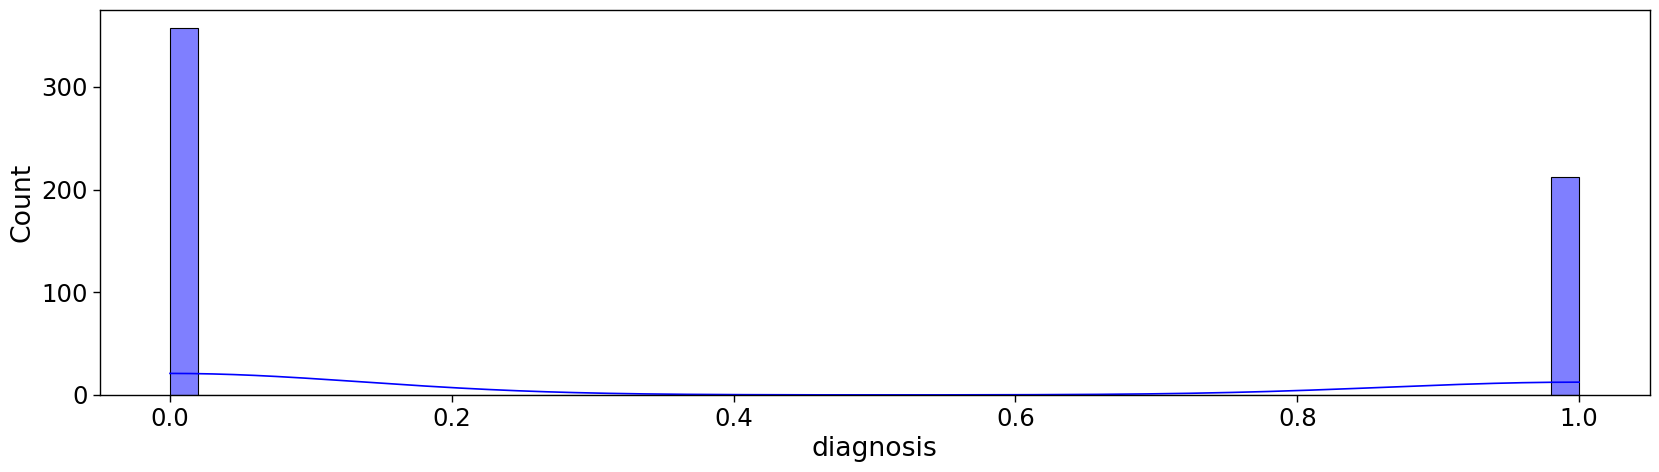

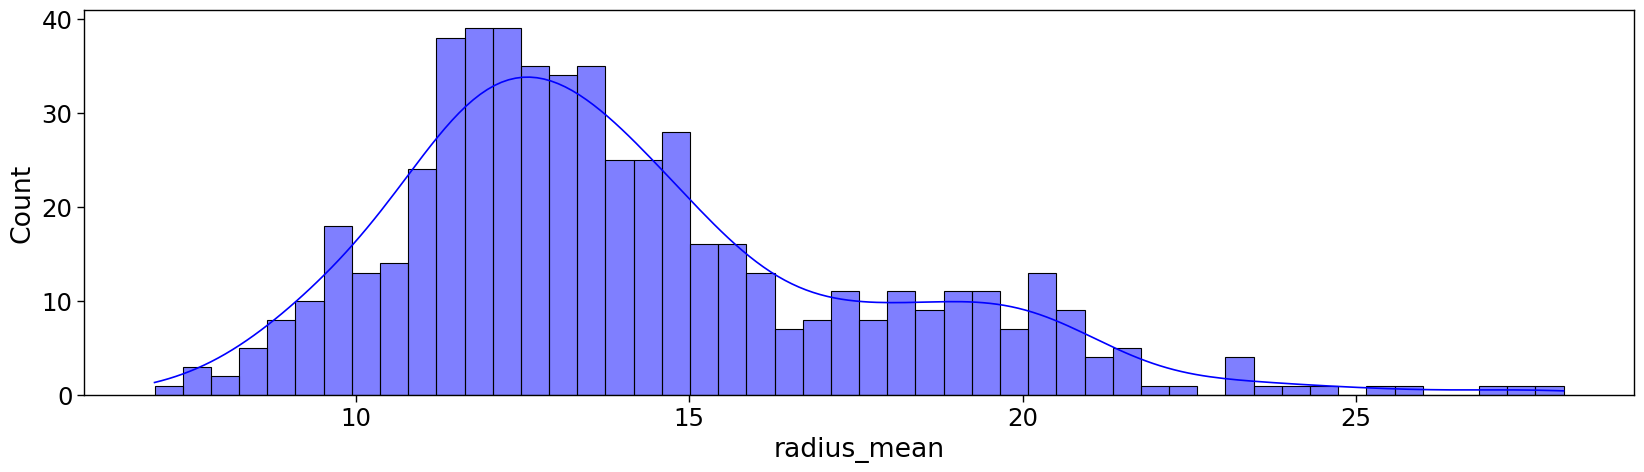

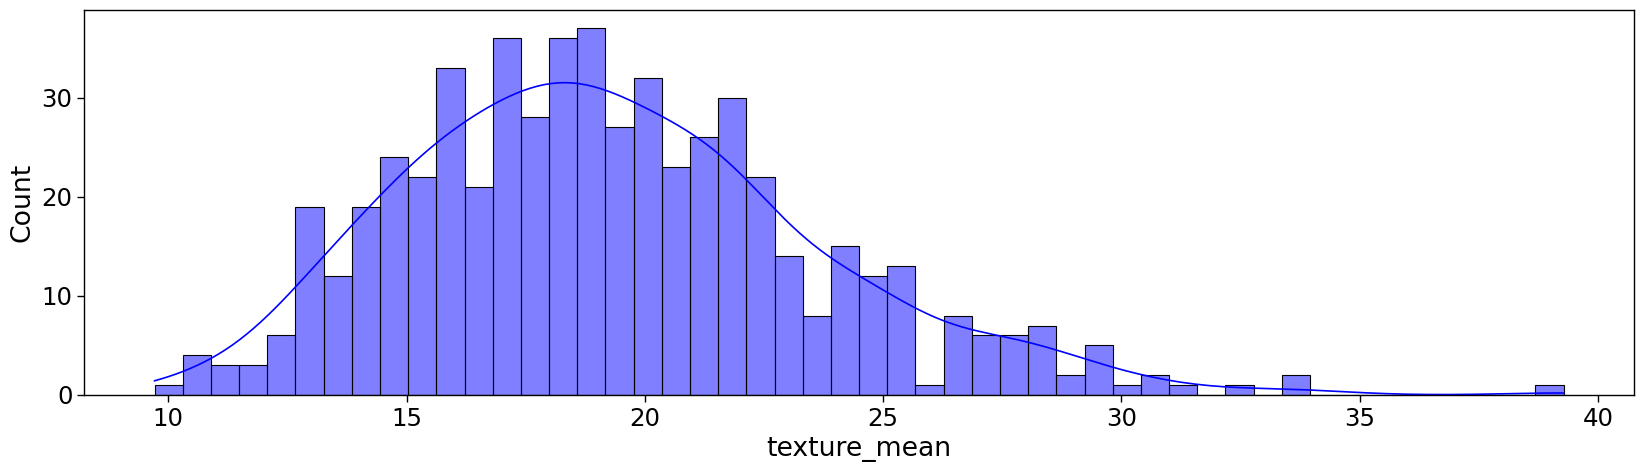

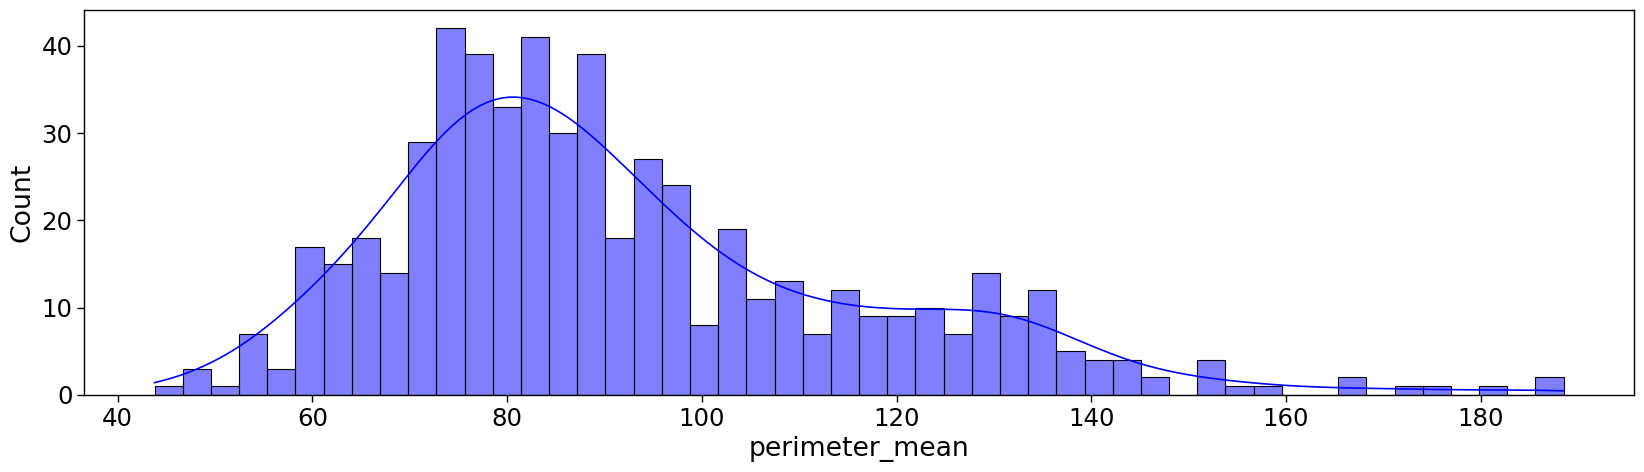

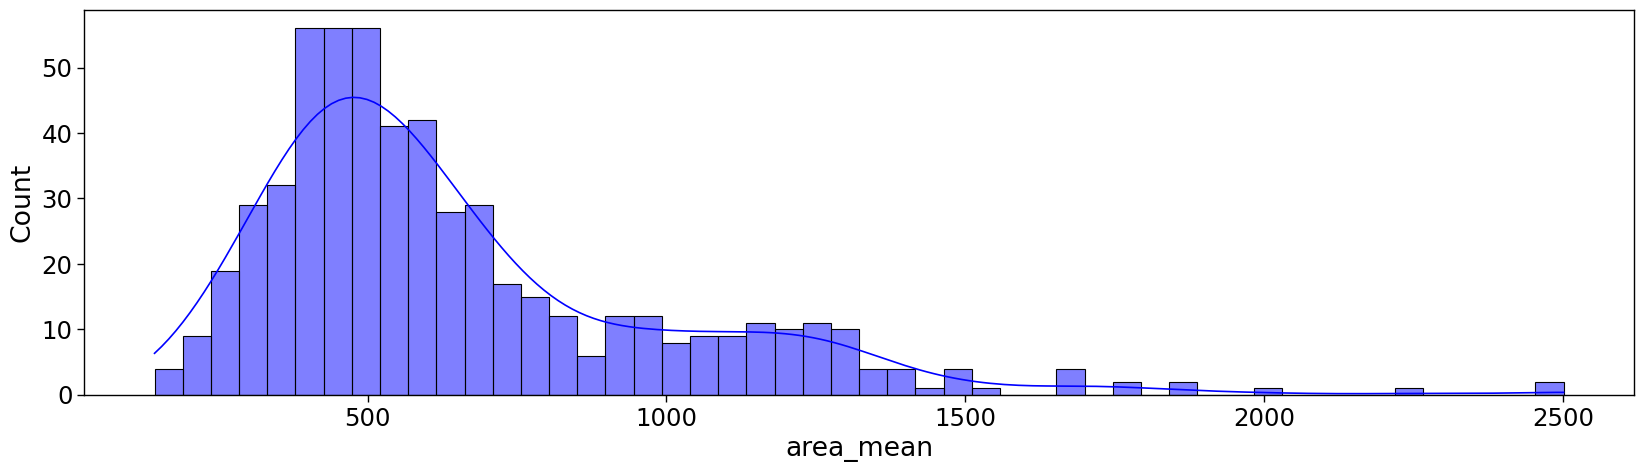

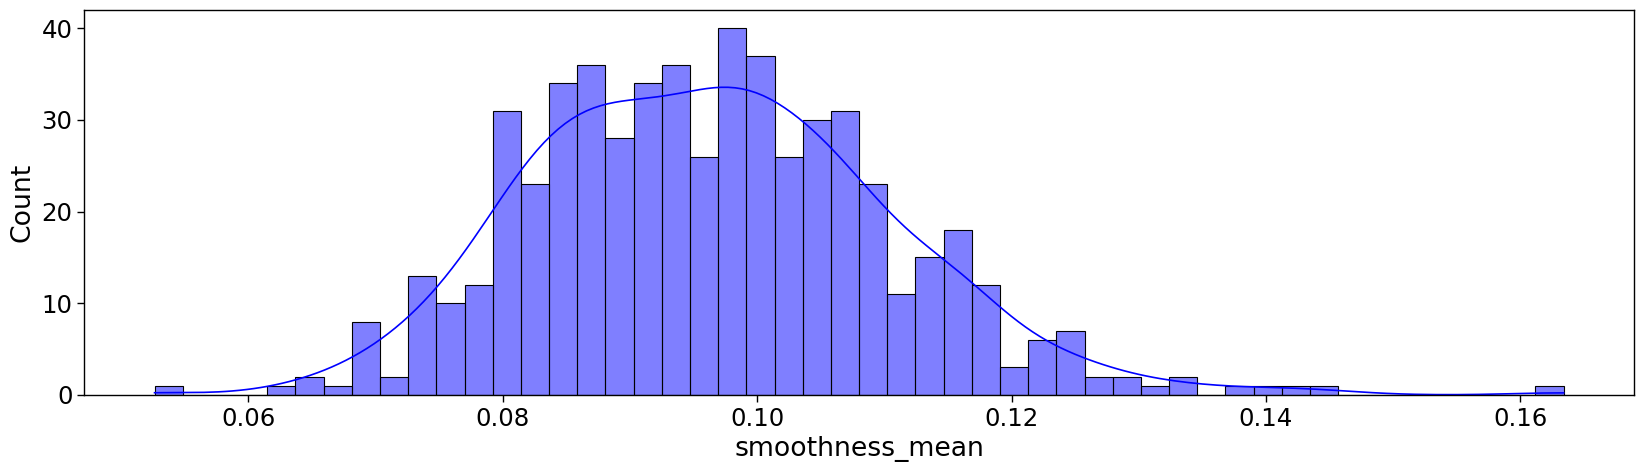

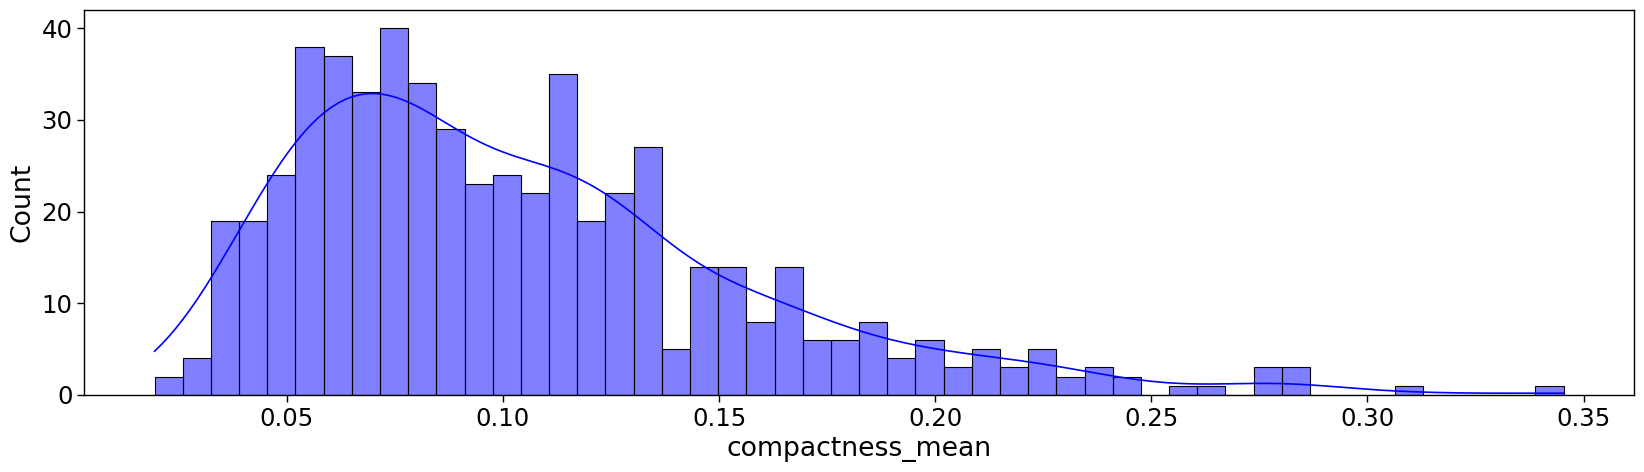

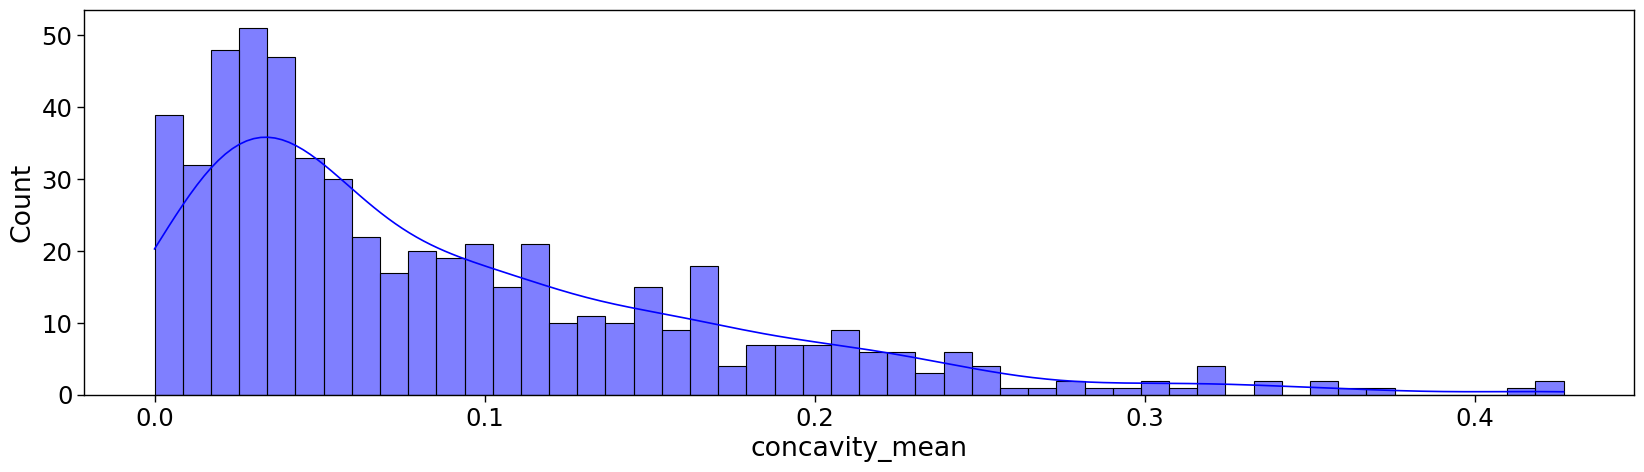

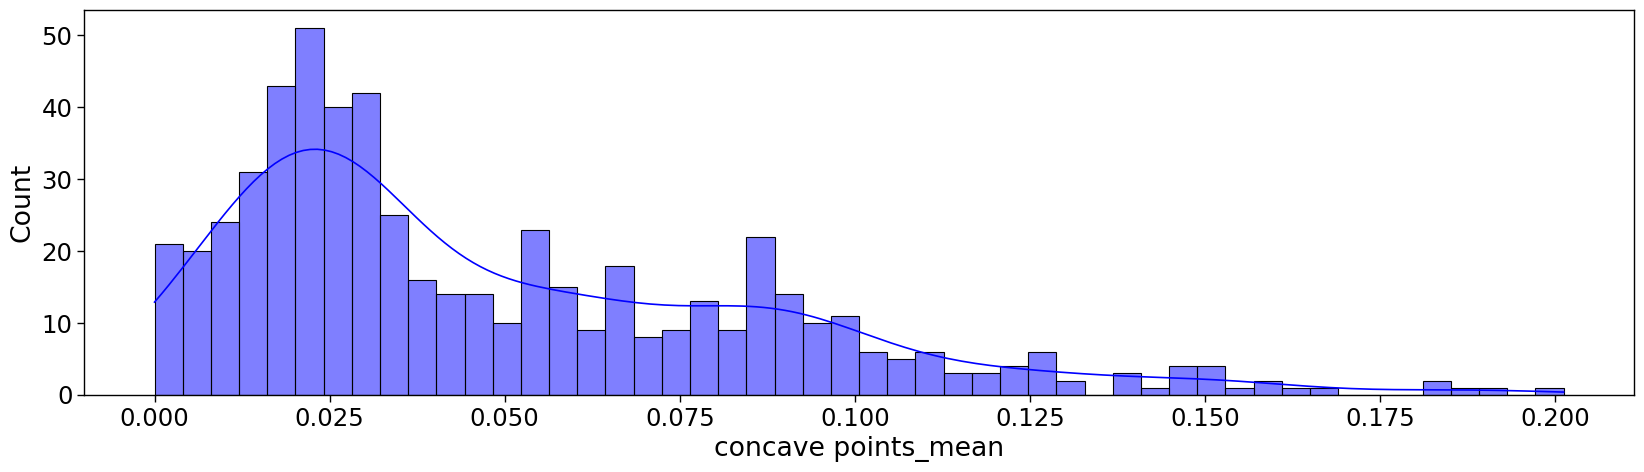

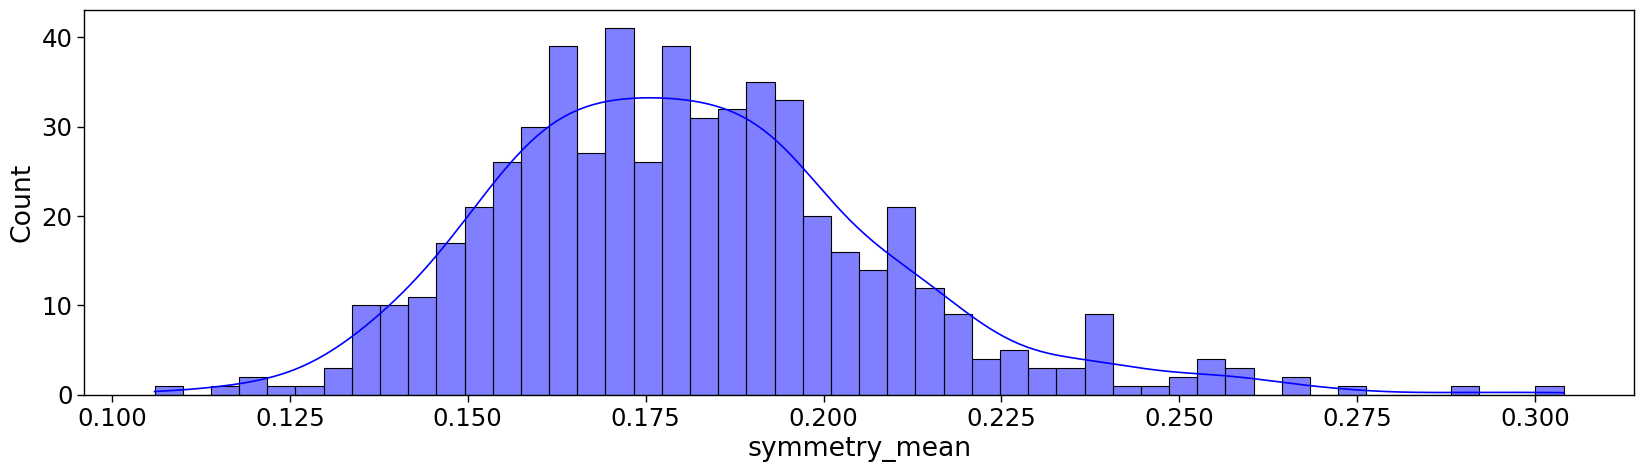

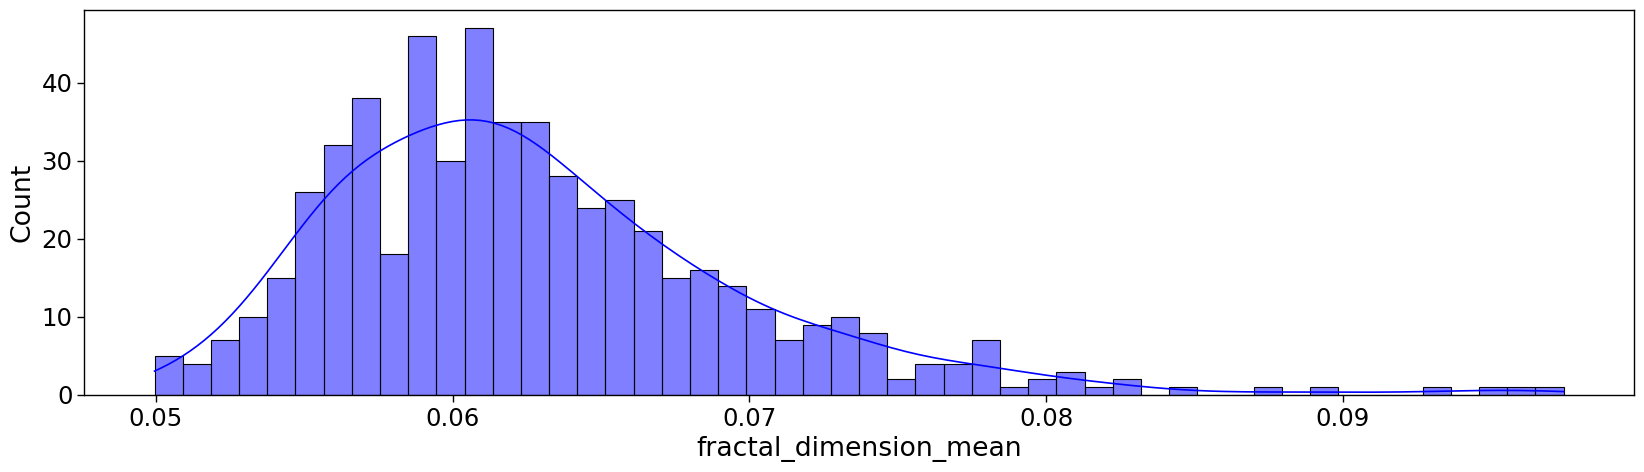

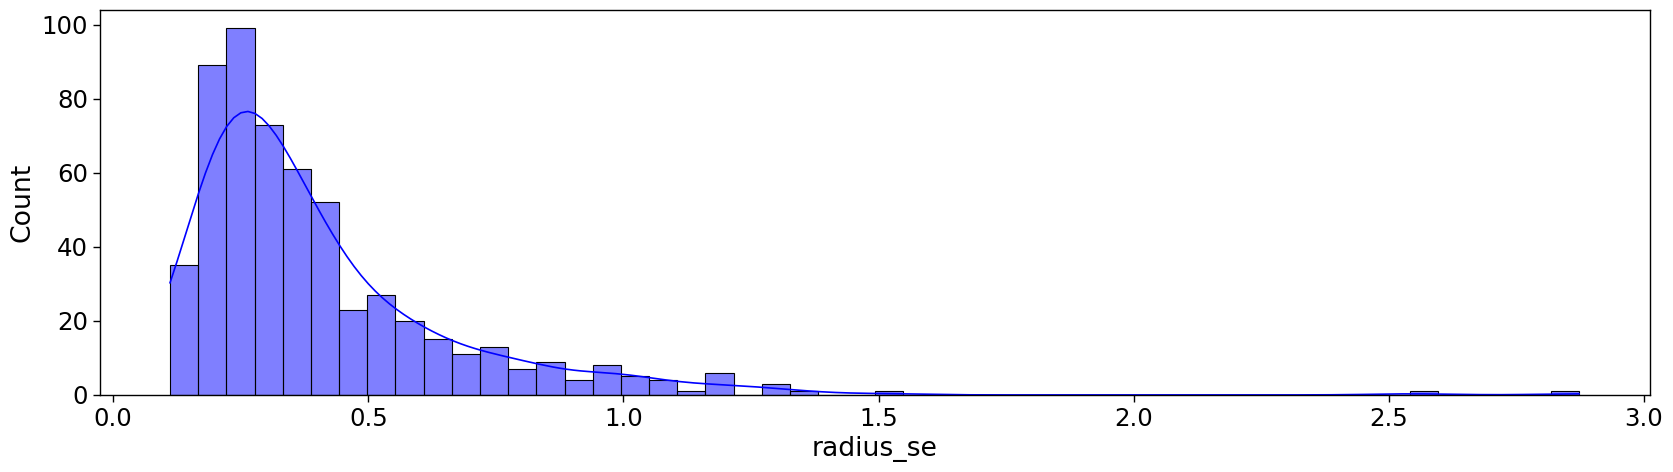

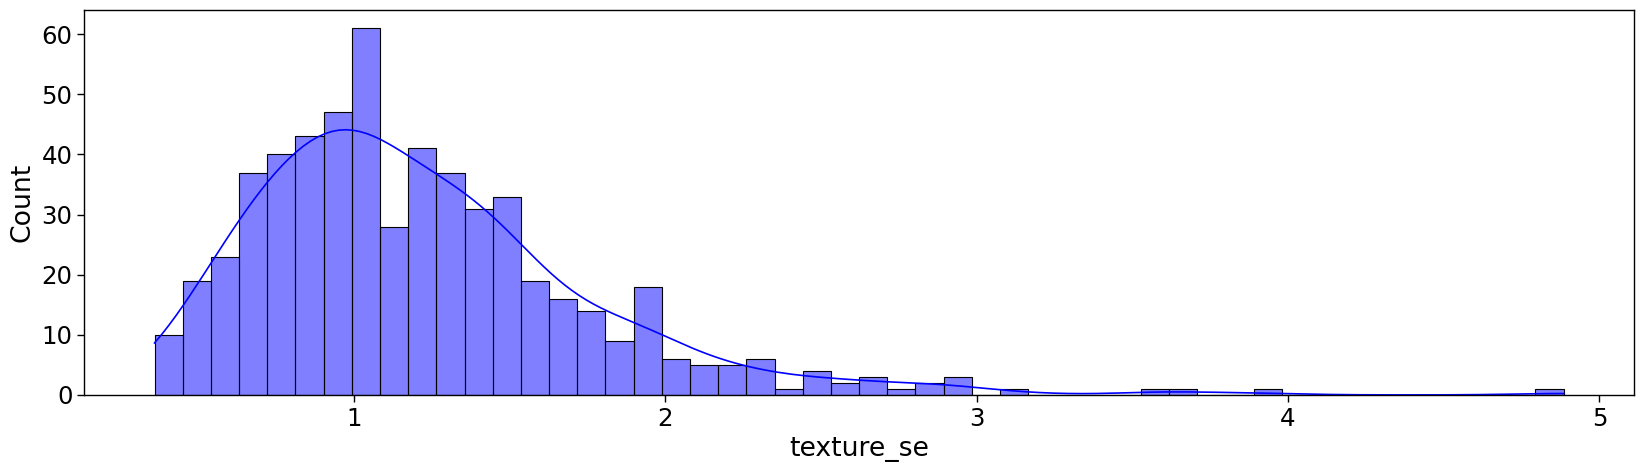

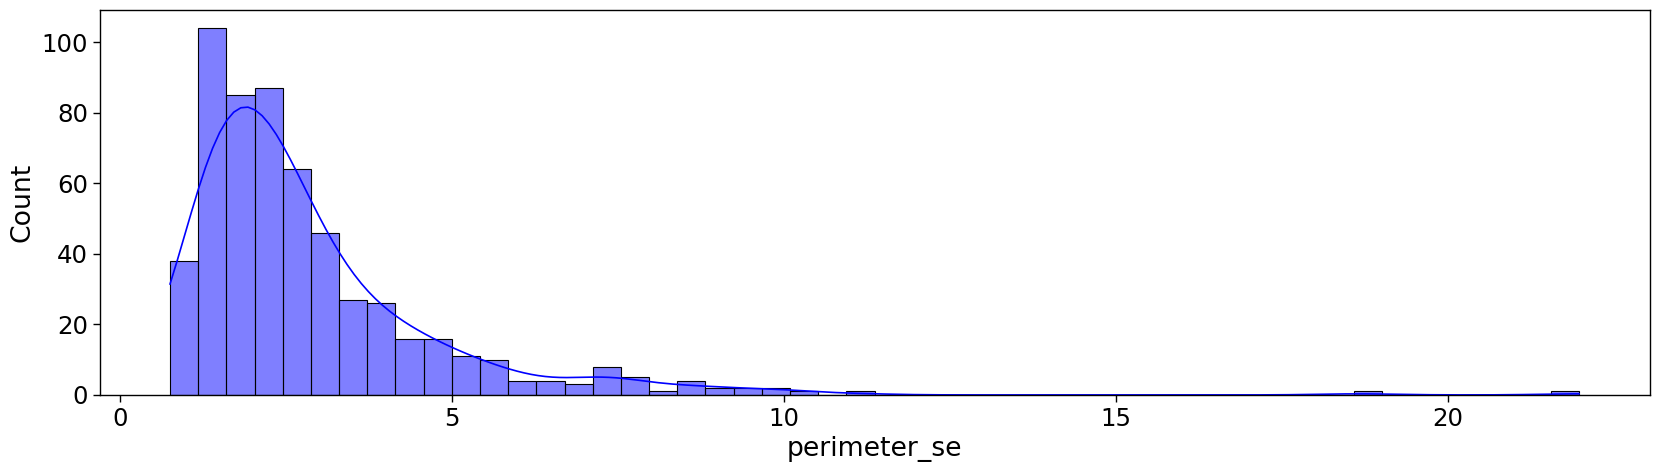

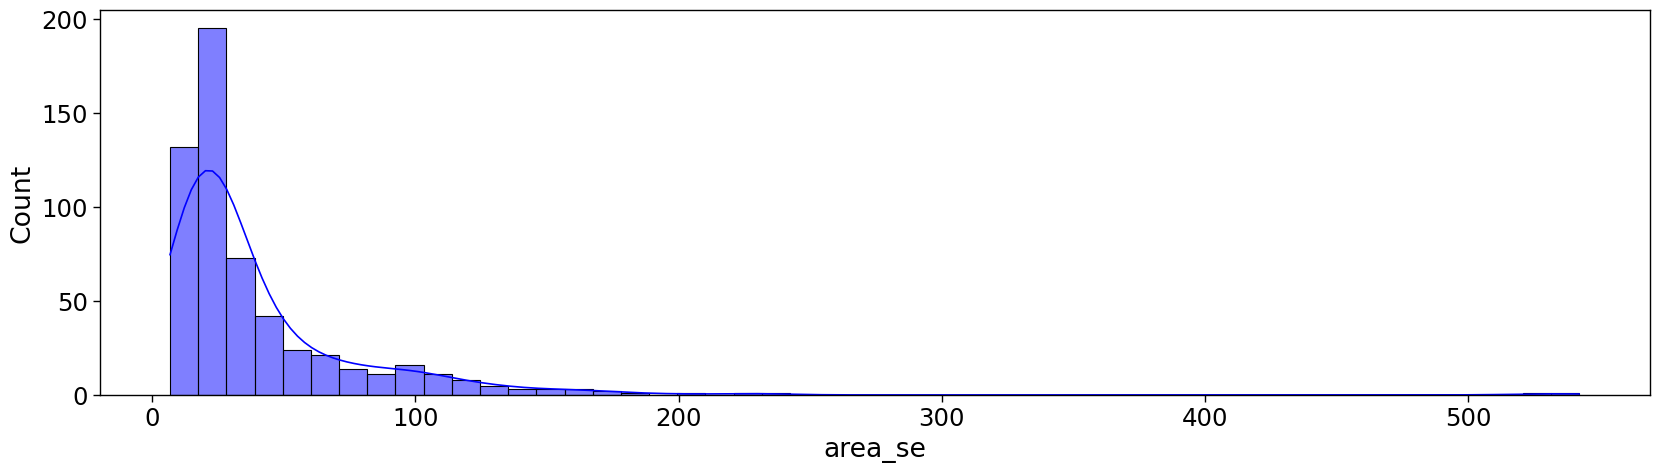

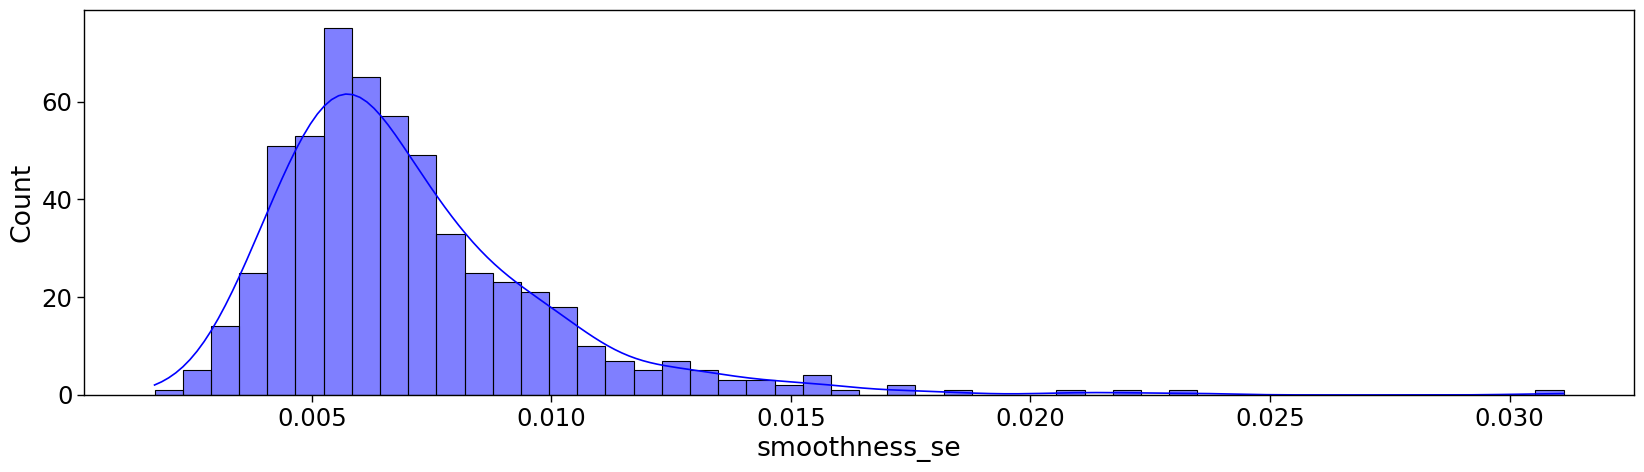

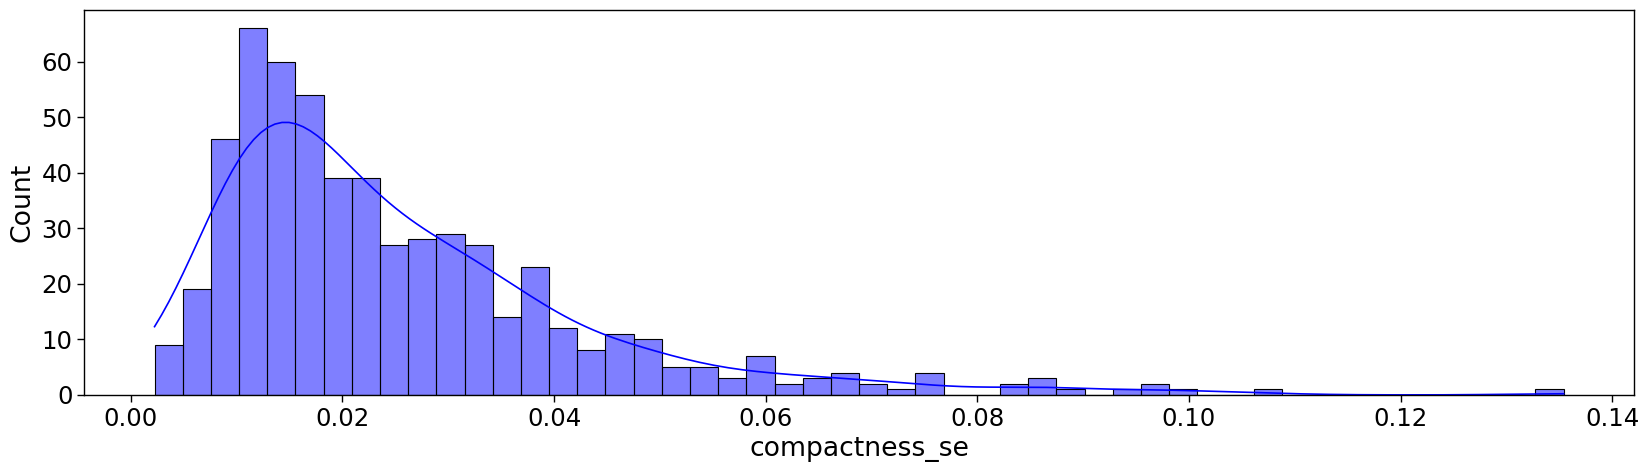

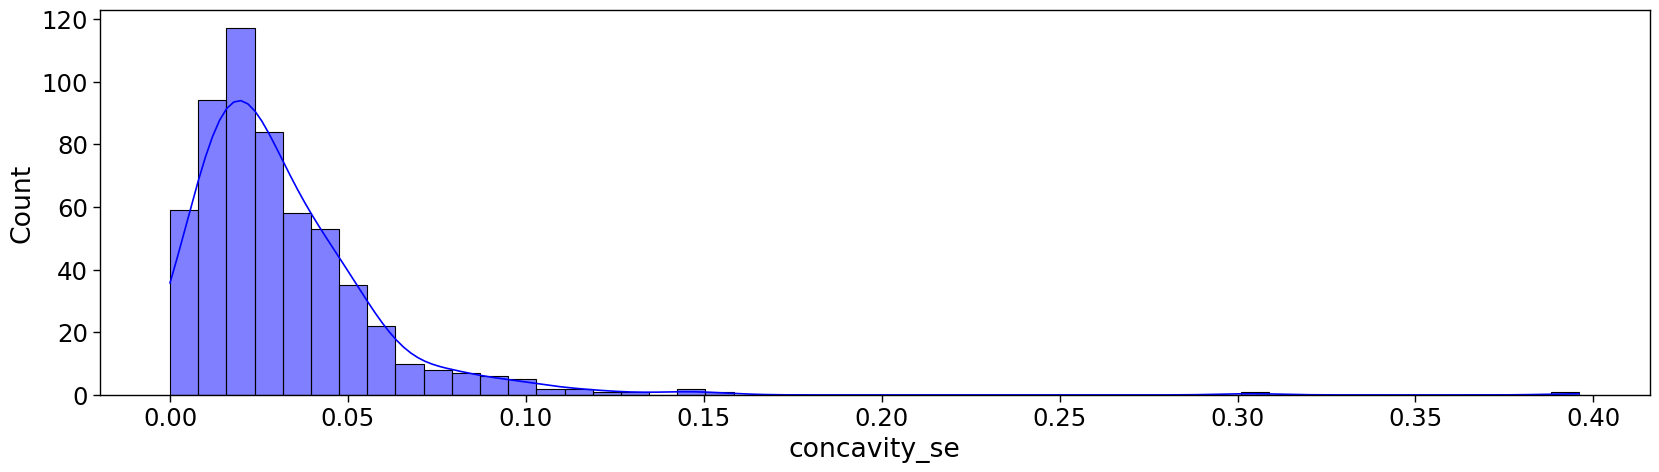

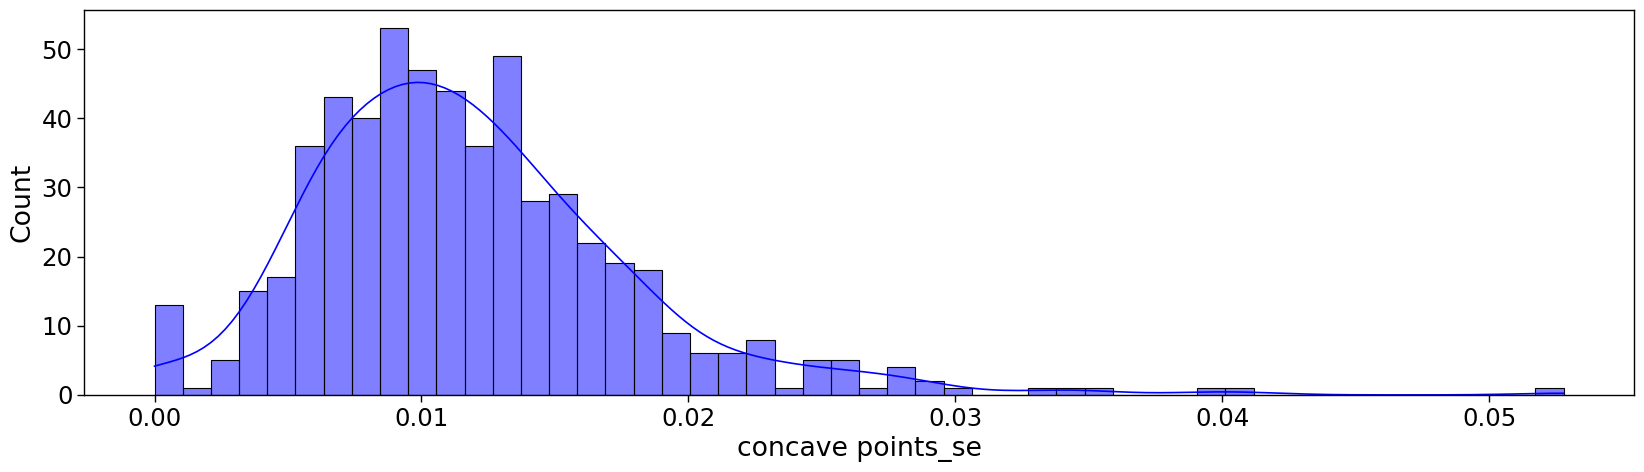

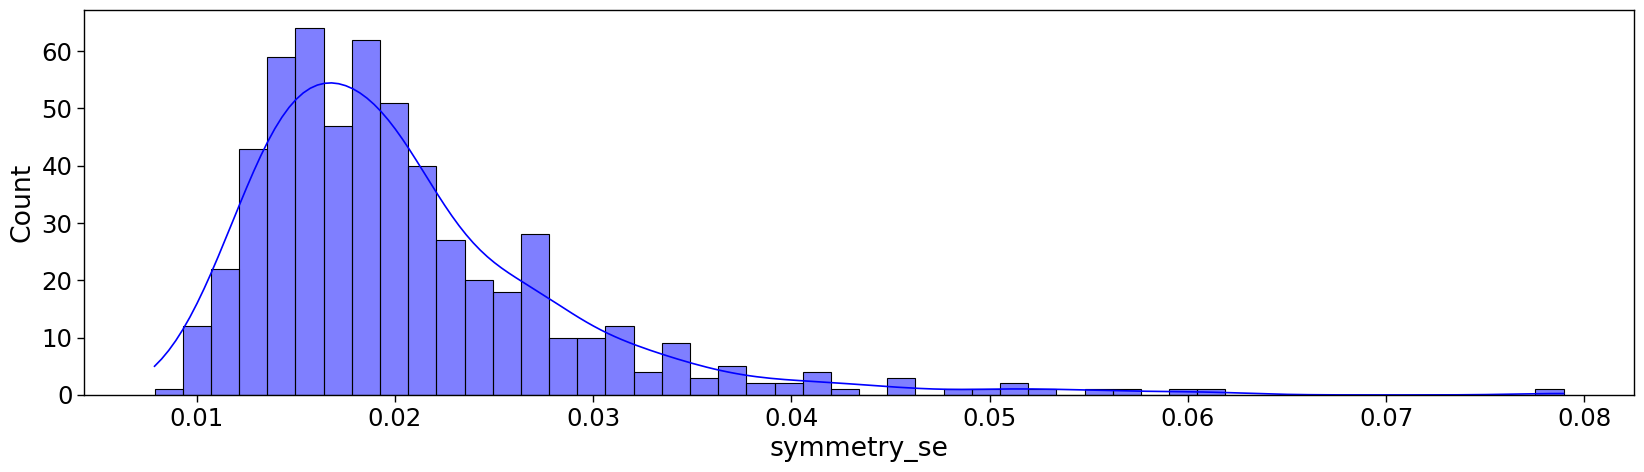

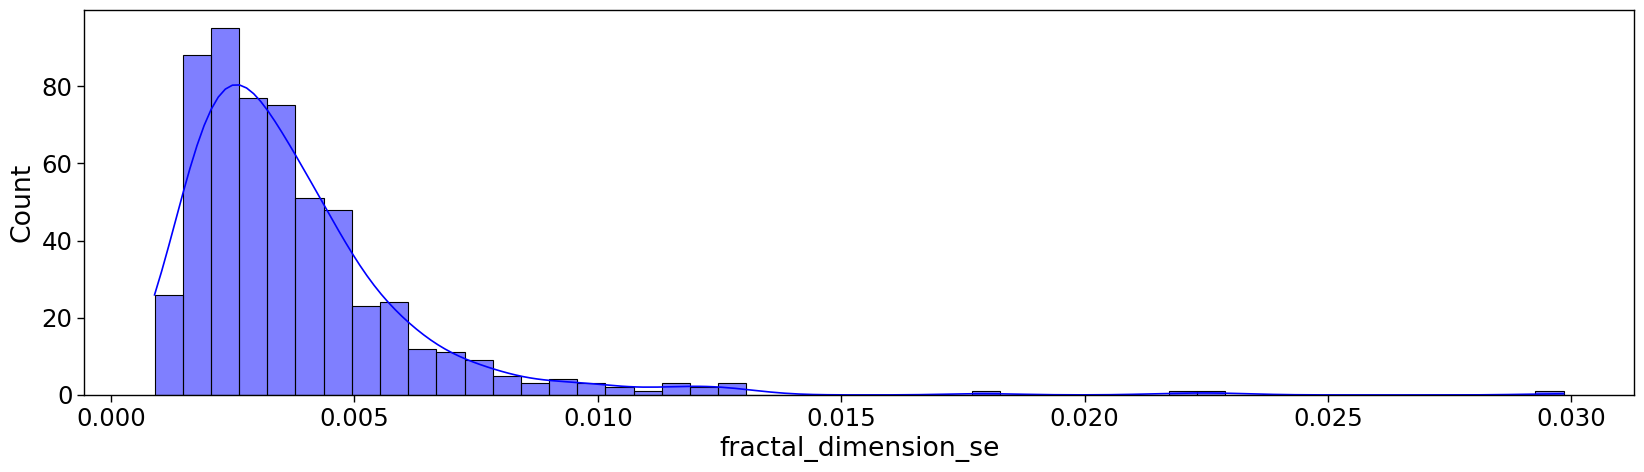

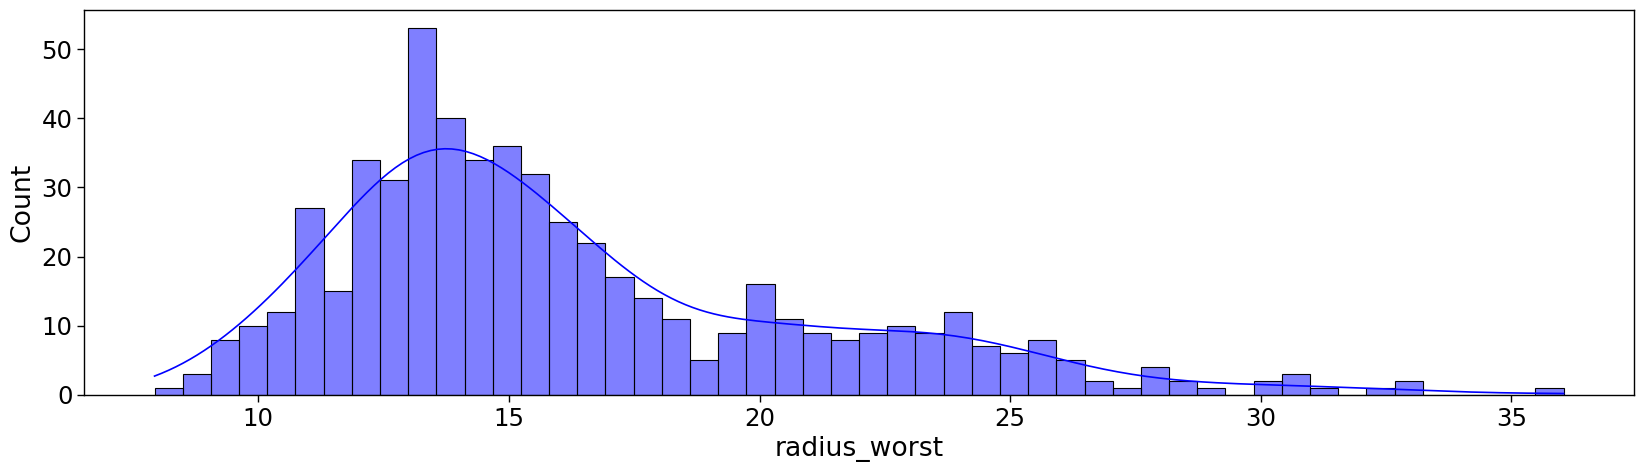

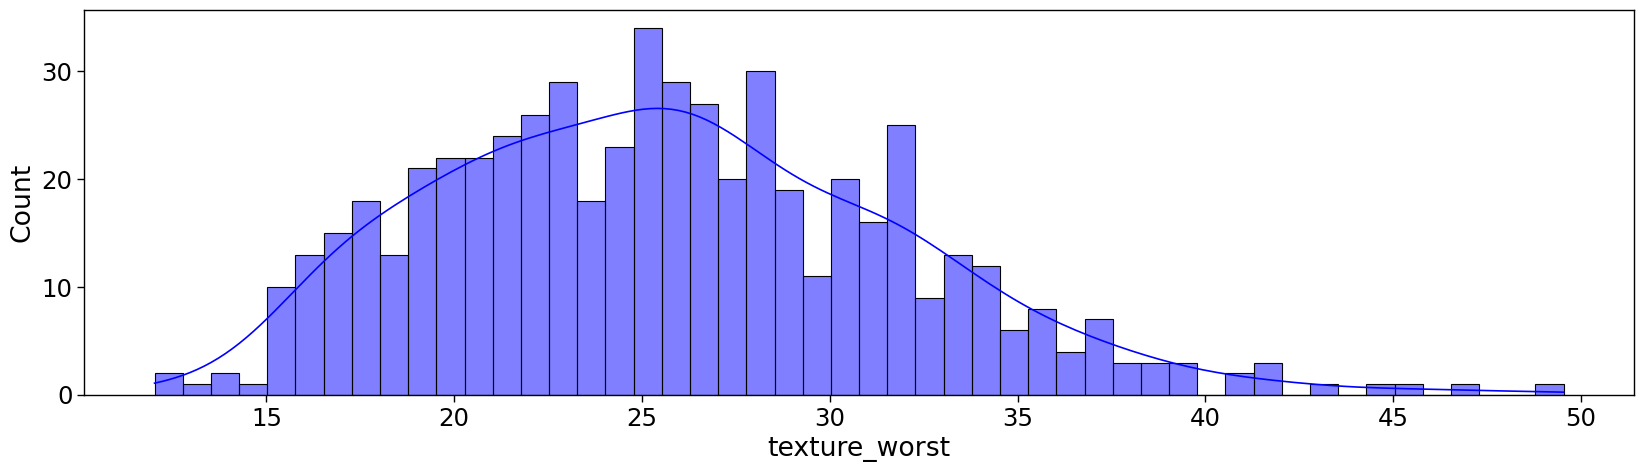

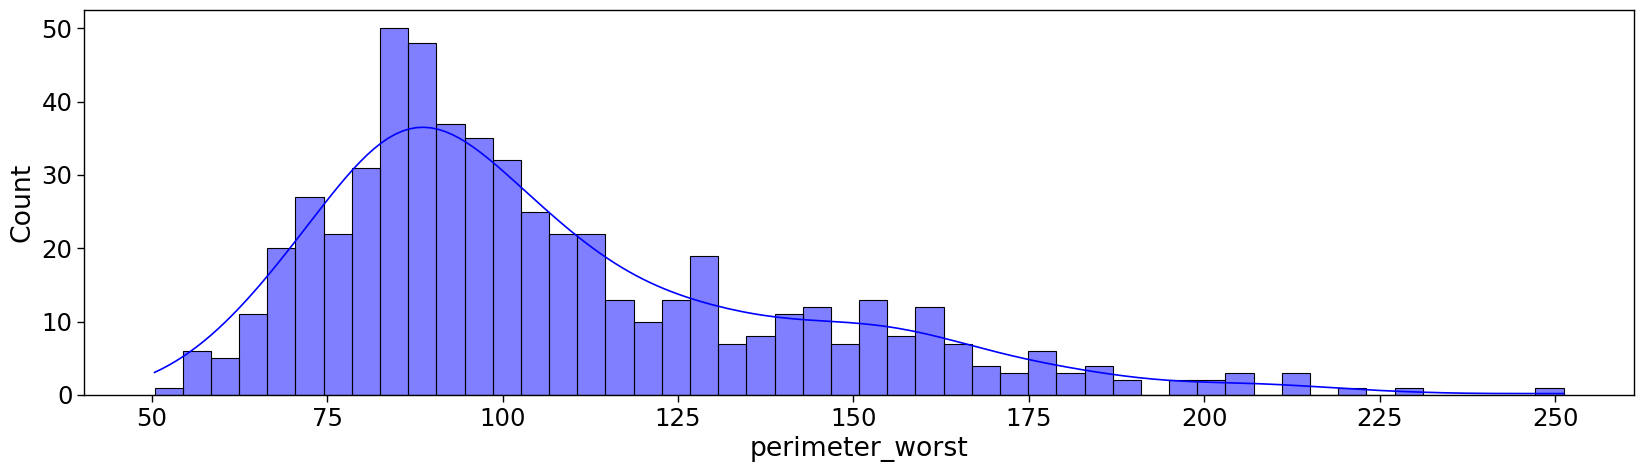

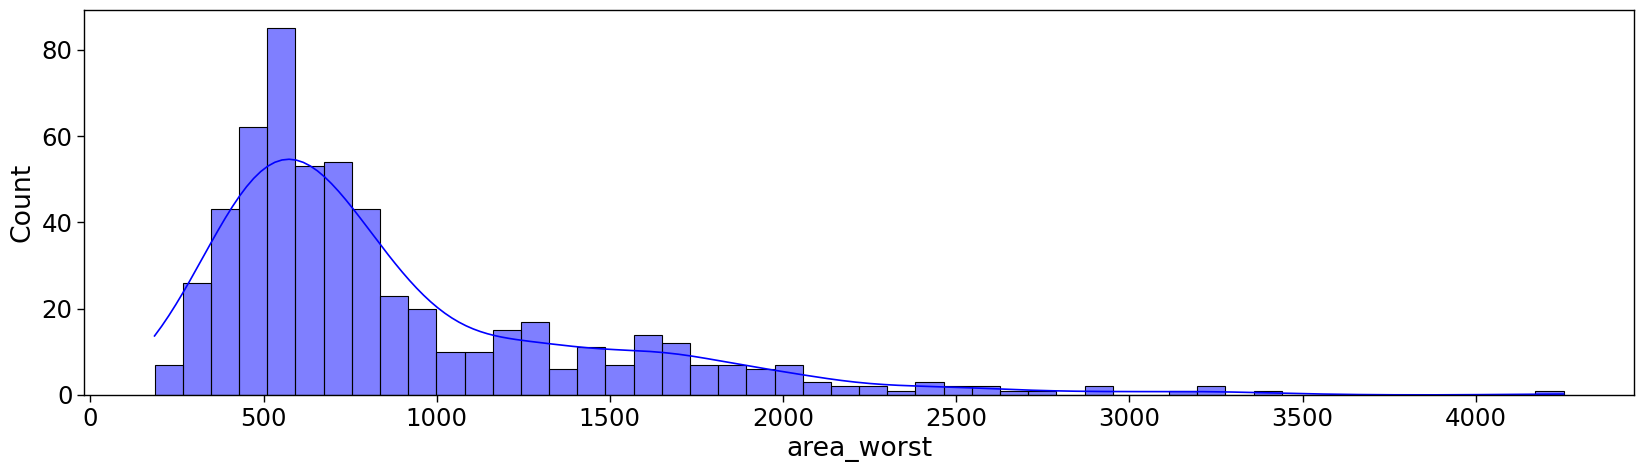

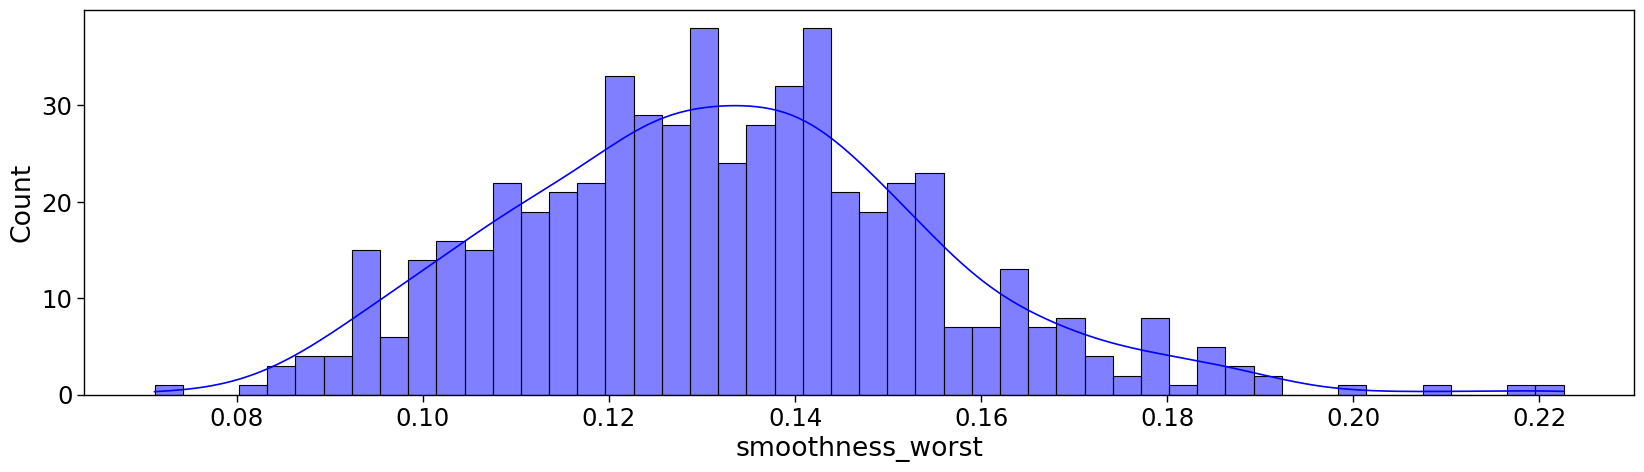

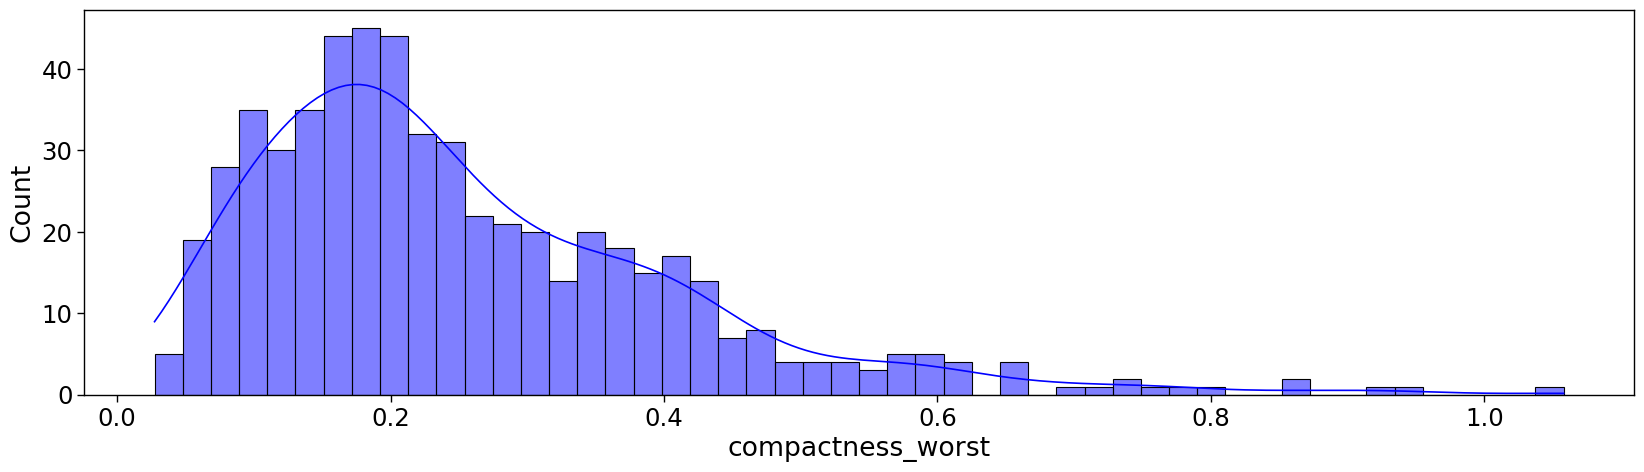

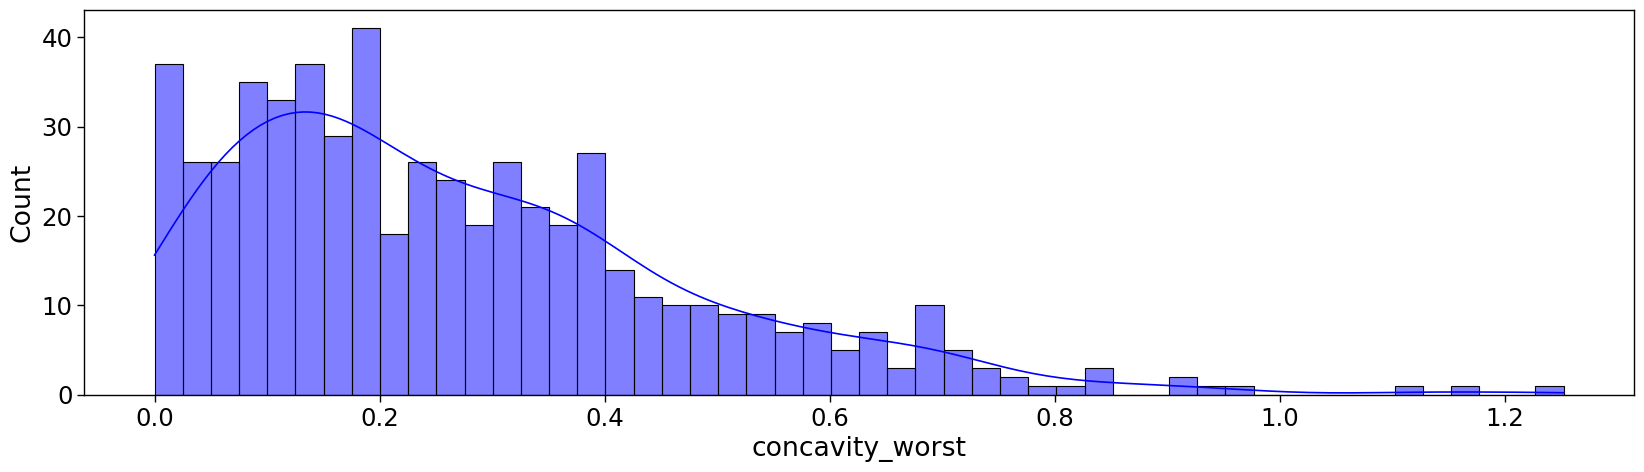

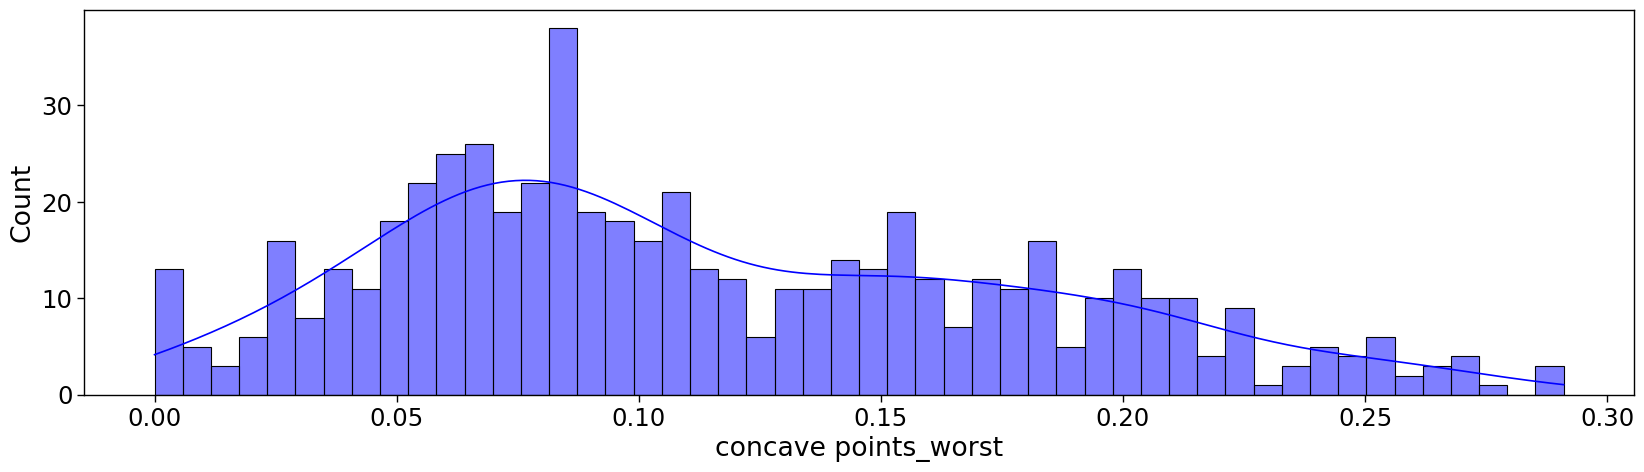

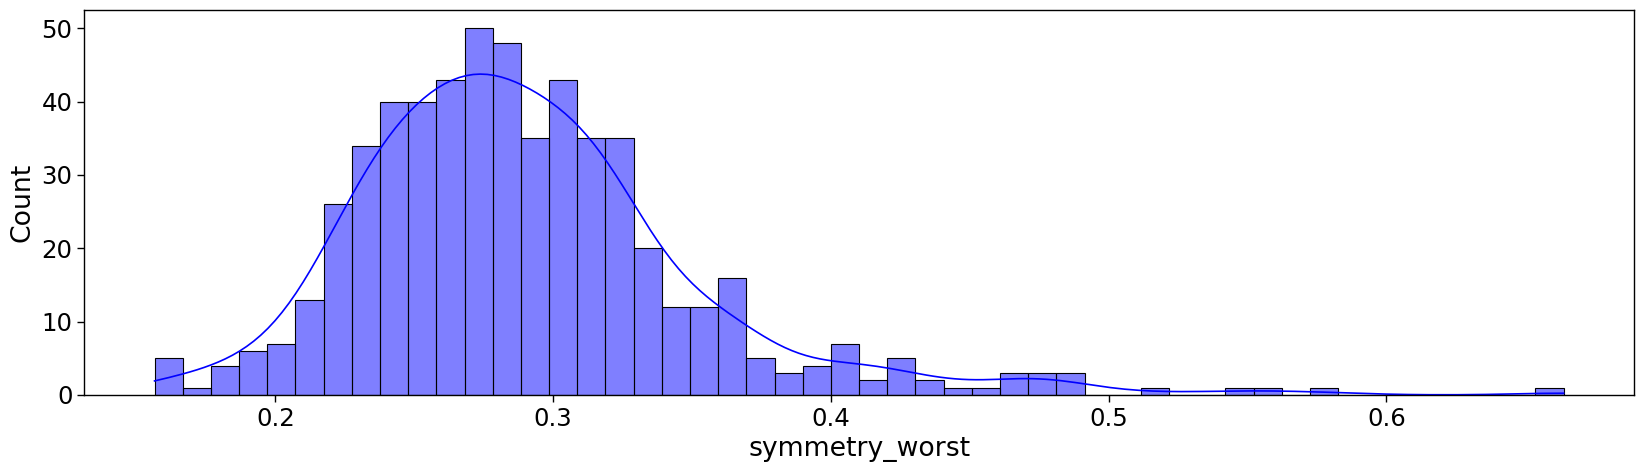

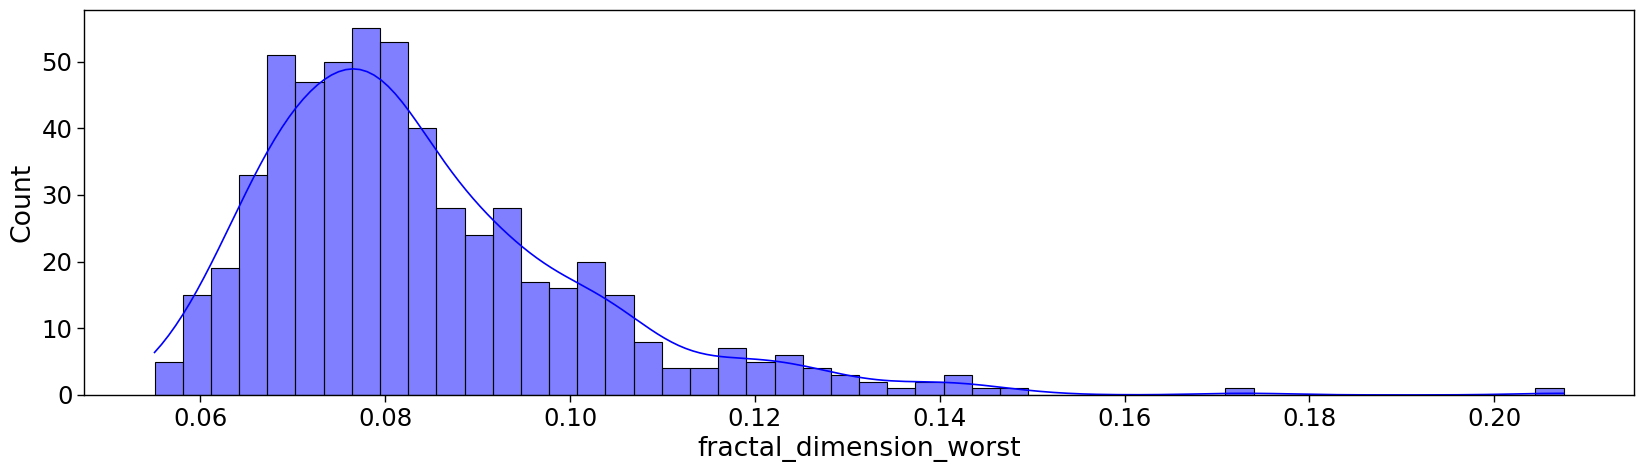

In [8]:
# Print out plots of each variable (column header) along with 
# KDE superimposed
for variable in cancer_variables:
    sns.set_context("paper", font_scale=2)
    plt.figure(figsize=(20, 5))
    sns.histplot(df[variable],color='blue', bins=50, kde=True)
    #plt.show()

## Classifiers review

### Classifier definition

A *classifier* is any algorithm that can categorise information or sort data into labelled classed.<br>
An example of a classifier is the spam filter on your email software.


A *classification model* is the result of the machine learning done by the classifier.<br>
Because the model has been trained using the classifier, it's the model itself that classifies any future data.

There are [*supervised* and *unsupervised*](https://monkeylearn.com/blog/machine-learning-algorithms/#supervised) classifiers.

*Supervised* classifiers need:
- A training dataset
- dataset that has variables already  sorted/categorised

There are two types of *Supervised* classifier types: 
1) *classification*
2) *regression*

With *classification*, the result will always be in a finite set of classes or categories (determined by the training dataset).

With *regression*, the result will be probability as a continuous number value, between 0 and 1. It's used to predict the probability that something will occur, i.e. stock prices, housing market trends, etc.


*Unsupervised* classifiers need:
- An unlabelled dataset

From the unlabelled dataset, the *unsupervised* classifier will determine patterns and anomalies in the data and make classify or structure the data as it sees fit.

As the Wisconsin Breast Cancer dataset contains structured data, only *supervised* classifiers will be used to develop a model for predicting cancer rates.

## Classifier types and applications

<br>


All the algorithms below are types of *supervised* learning algorithms.

### Decision Tree

A decision tree is a classification algorithms that builds models akin to a tree, i.e.<br>

*sports* is the trunk<br>
*sport type* are the branches (field sports, bat sports, etc)<br>
*exact sport name* are the 'leaves', i.e. (soccer, hurling, tennis, etc)<br>

Decision trees use *if-then* rules to classify data into precise categories - however, in order to do this, high-quality data (i.e. no errors or missing values, etc) is needed to avoid the branches being skewed or over-fitted.

### Random Forest

A random forest classifier is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset ([From scikit learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)).<br>
That's where the name comes from - the 'Forest' is multiple decision trees.<br>
It works by randomly selecting a sample of the data and gets the predictions from each tree.

### Naive Bayes Classifier

This is, in fact, a family of probabilistic algorithms.<br>
Naive Bayes calculates the possibility that any given data point may be assigned to a category, or indeed, multiple categories.

Naive Bayes is often used for text analysis to categorise emails, news, articles, customer comments for online reviews, etc, into categories.<br>
Moving from phrase to phrase, the classifier will calculate the probabililty that a data point belongs in that particular category - Yes/No.

### K-Nearest Neighbours

K-Nearest Neighbours is often abbreviated to k-NN.<br>
It's a pattern recognition algorithm and works by learning from training data points and calculates how the data corresponds to other data in the training space.<br>
k-NN wants to:<br>
- find the *k* most closely related (correlated) data points in future data
- by calculating the correlation of data points within *n*-dimensional space

### Support Vector Machines

Support Vector Machines are commonly abbreviated to *SVM*.
SVM algorithms classify data and train models with precision *(rewrite this)* to create a n-dimensional classsification model.
For 2-dimensional data (i.e. x, y) this is simply a line of best fit and not the strongest suit of SVM.
However, for data that is in 3-dimensions, the *hyperplane* (line of best fit) can be very accurate.
SVM create accurate ML models as they were designed to work with multidimensional data.

### Logistic Regression

Logistic regression is an algorithm that predicts a binary outcome.<br>
This can be:<br>
- 1 or 0
- Yes or No
- Pass or Fail

Independent variables can be either categorical or numeric; however, the dependent variable is always categorical, i.e.<br>
"What is the probability of category X given independent variable Y?

## How is a classifer evaluated?

To recap from above ([Classifier definition](#Classifier-definition)), the classifier develops a model after learning from the test data; however, one must know *how well* the classifer learns and if the model is good enough for the task at hand.<br>
The metrics used for classifier evaluation are determined from the models performance in the *test* set.<br>

The simplest evaluation for classifiers is **accuracy**.<br>
Accuracy is the fraction of data points that are correctly classified (i.e. correctly predicted from the training data).
Accuracy is calculated to be the sum of true positives and true negatives divided by all data points.<br>
Consider the equations below:<br>

$TP$ = True Positives<br>
$TN$ = True Negatives<br>
$FP$ = False Positives<br>
$FN$ = False Negatives<br>
$Total$ = Total data points<br>


$$Accuracy = \frac{TP + TN}{Total}$$<br>

$$Precision = \frac{TP}{TP+FP}$$<br>

$$Recall = \frac{TP}{TP+FN}$$<br>

### Confusion Matrix

A [confusion matrix](https://machinelearningmastery.com/confusion-matrix-machine-learning/) is a summary of prediction results on a classification problem.

The number of correct and incorrect predictions are summarized with count values and broken down by each class. This is the key to the confusion matrix.<br>
It shows the ways that the classifier is *confused* when making predictions.<br>

How to calculate a confusion matrix:

1. A test dataset with expected outcome values.
2. Make a prediction for each row in the test dataset.
3. From expected outcomes and predictions count:
    a. The number of correct predictions for each class.
    b. The number of incorrect predictions for each class, organized by the class that was predicted.

These numbers are then organized into a a matrix so that:

- Each row of the matrix corresponds to a predicted class.
- Each column of the matrix corresponds to an actual class.

The counts of correct and incorrect classification are then filled into the matrix.

### Precision and Recall

**Precision** is the measurement determined by the correctly classified positive data points divided by the total number of data points that are classed as positive.<br>

**Recall** is the measurement of correctly classified positive data points divided by the total number of actuall positives in the test set.<br>

*Precision-Recall* is an important metric in evaluating a classifier.<br>
*High Precision* means that a classifier returned much more relevant results than irrelevant;<br>
*High Recall* means that a classifier returned most of the relevant results. 

### ROC Curve and AUC

ROC stands for *Receiver Operating Characteristic* and AUC stands for *Area Under ROC Curve*.
[Google Developers](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc) gives a good definition of what this is.<br>

Essentially, the ROC Curve is a graph showing the performance of the classification model at all thresholds.<br>
$FPR$ = False Positive Rate<br>
$TPR$ = True Positive Rate = $Recall$<br>


$FPR$ and $TPR$ are the two parameters that are plotted against each other.<br>

$$FPR = \frac{FP}{FP+TN}$$<br>
and<br>
$$Recall = \frac{TP}{TP+FN}$$<br>

The ROC curve plots FPR vs TPR (x vs y) at different classification thresholds.<br>
If the classification threshold is lowered, False Positives and True Positives are increased.<br>
Tools like scikit-learn can be used to plot an ROC curve.<br>




After the ROC curve is plotted, the area under the curve can be determined.<br>
The mathematics to determine this is calculus (integral calculus), integrating between 0 and 1.<br>

AUC is mainly used because:<br>
- It measures the ranking of predictions, rather than absolute values.
- It measures the quality of predictions regardless of what classification threshold is chosen by the user.

### F1 score

The F1 score is another metric that's used to evaluate a machine learning model.<br>
The F1 score balances Precision and Recall.<br>


**Precision** is the ability of the classifier not to label a true negative as a positive.<br>

**Recall** is the ability of the classifier to find all positive results.<br>

**F1 score** is the balance between **Precision** and **Recall**.<br>

The F1 score is defined as:

$$F_1 = \frac{Precision * Recall}{Precision + Recall}$$

## Literature review

### Acronyms

The following is a review of the papers that were found when researching the topic.<br>
A brief explanation of the terms used when describing classifiers and/or models is listed below

**Algorithms**<br>
- NB: Naive Bayes
- SMO: Sequential Minimal Optimization
- J48: Decision Tree
- KNN: K-Nearest Neighbours
- SVM: Support Vector Machines
- RF: Random Forest
- XGBoost: eXtreme Gradient Boosting
<br>

**Analysis**<br>
- PCA: Principal Components Analysis
- AUC: Area Under Curve
- LR: Linear Regression
- RFE: Recursive Feature Elimination



[S. Shetty:](Wisconsin_papers/simithasitaramshetty.pdf)<br>
An (unmarked) Master's thesis submission so wouldn't be placed as highly in terms of what's being done, however, outlines some points:
<br>
- Reviews neural networks
- Outlines framework
- How Feature Selection is determined
- Reviews classifiers
- Evaluation of classifiers

[R. Dang, A. Nilsson](Wisconsin_papers/Evaluation_Breast_Cancer.pdf)<br>
Another paper, as part of an undergraduate project:<br>
- Explains PCA well
- Mathematical explanation of classifiers
- Defines classification accuracy, sensitivity and specificity
- Evaluates classifiers

[Z. Zhang, Z. Li](Wisconsin_papers/evaluation_classifers.pdf)<br>
A journal paper specifically focussing on the evaluation methods used for breast cancer prediction.
- Focusses on five classifiers - supervised learning.
- Covers what methods have been used historically to test classifiers
- Goes into Area Under Curve (AUC) for each classifier
- Defines Precision-Recall curve and it's relation to the the model
- Concluded that overall, Linear Regression (LR) performed best for classification

[S. A. Mohammed et al](Wisconsin_papers/Breast-Cancer-detection_Chapter_10.pdf)<br>
3 authors - wasn't sure whether this was a journal paper, however, references other papers well.<br>
- Comprehensive literature review in tabular format with:
    - Paper title
    - Dataset used (majority of which is Wisconsin)
    - Algorithms used
    - Results of algorithms
- Focusses on three classifiers only: NB, SMO and J48
- 10 fold cross validation after data preprocessing, before classification
- Concluded SMO was the best classifier


[V. Magboo, Ma. Magboo](Wisconsin_papers/breast_cancer_classifiers.pdf)<br>
Seems to be another journal paper by two authors.<br>
Slightly different to the other papers thus far, in the sense that four algorithms are all evaluated, but in a slightly different way each time.
- LR, NB, KNN and SVM evaluated
- First way is the 'normal' way of EDA, data preprocessing, train/test split and 10-fold cross validation before training
- Second way uses PCA after data preprocessing
- Third way uses second way plus random oversampling on training set
- Fourth way is the same as second but correlation is used to remove features instead of PCA
- LR was concluded to be the best method


[S. Abdulkareem, Z. Abdulkareem](Wisconsin_papers/ensemble_classifiers_wisconsin.pdf)<br>
Another [journal](https://www.ijsr.net/) paper, most likely from potential PhD students from looking at the [requirements of publishing](https://gssrr.org/index.php?journal=JournalOfBasicAndApplied?journal=JournalOfBasicAndApplied) in the journal.<br>
Hard to read because of the formatting. 

- Looks at two ensemble classifiers only: RF and XGBoost
- Explanations of RF and XGBoost
- Uses RFE to determine which variables contribute to producing a positive diagnosis
- XGBoost was concluded to be the best with 99% accuracy




## Statistical analysis of dataset

When doing any analysis or plotting, the variables will be named as follows:<br>
*variable_name*_*statistic_name* <br>
i.e.<br>
*concave points_worst* would become<br>
cpw_mean

Comments in the code will explain further.

### Ratio of negative to positive results

How many negative results versus positive from the dataset?

In [9]:
# below gives the percentage of negative (0) versus positive (1)
df["diagnosis"].value_counts('0')*100

0    62.741652
1    37.258348
Name: diagnosis, dtype: float64

So approximately 63% negative and 37% postive results in the dataset.

### Correlation between variables and diagnosis

In [10]:
# Correlated variables, descending, assign to variable.
var_cor_desc = df.corr()['diagnosis'].sort_values(ascending = False)
print(var_cor_desc, '\n')
print(f'Number of variables: {len(var_cor_desc)}')

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0

Below is grouped by variable (vertically) and diagnosis (horizontally), by the mean value of each variable.<br>
This is done so that one can quickly look at the values for the variables and get an idea as to a potential diagnosis, before running through any machine learning model.

In [116]:
df.groupby('diagnosis').mean().transpose()

diagnosis,0,1
radius_mean,12.146524,17.462830
texture_mean,17.914762,21.604906
perimeter_mean,78.075406,115.365377
area_mean,462.790196,978.376415
smoothness_mean,0.092478,0.102898
compactness_mean,0.080085,0.145188
concavity_mean,0.046058,0.160775
concave points_mean,0.025717,0.087990
symmetry_mean,0.174186,0.192909
fractal_dimension_mean,0.062867,0.062680


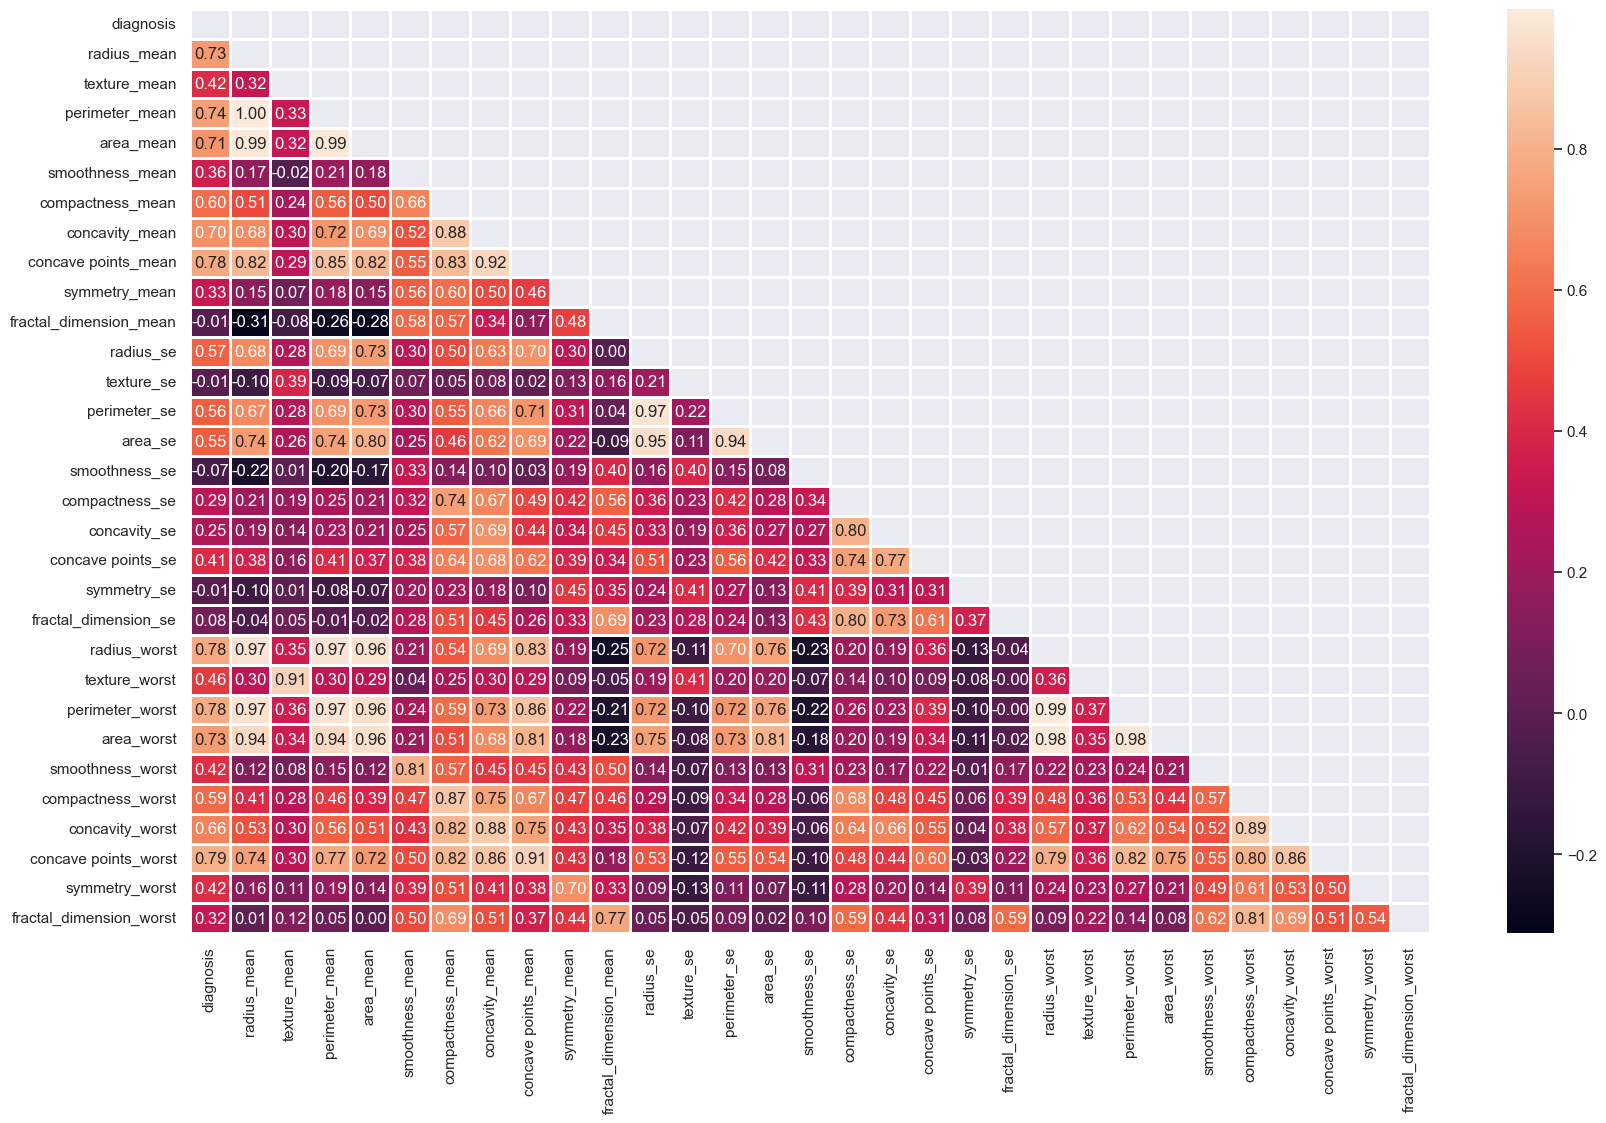

In [134]:
# heatmap to see correlation between variables

plt.figure(figsize = (20, 12))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(corr, mask = mask, linewidths = 1, annot = True, fmt = ".2f")
plt.show()

## Variables correlated to diagnosis

### Remove uncorrelated variables

Now the variables will be filtered, so that only the variables that have a correlation higher than 0.54 will be looked at.<br>
Why?<br>
The variables are reduced from 31 to 16, approximately a 48% reduction. Only the variables deemed to be positively correlated to diagnosis will be looked at.<br>
Also note that there's no negatively correlated variables.<br>

In [12]:
# pos_cor_var are the positively correlated variables with diagnosis


pos_cor_var = df.corr()[abs(df.corr()['diagnosis']) > 0.54].index
print(f'Positively correlated variables:')
print(pos_cor_var.sort_values(ascending = False), '\n')
print(f'Number of positive variables: {len(pos_cor_var)}')

Positively correlated variables:
Index(['radius_worst', 'radius_se', 'radius_mean', 'perimeter_worst',
       'perimeter_se', 'perimeter_mean', 'diagnosis', 'concavity_worst',
       'concavity_mean', 'concave points_worst', 'concave points_mean',
       'compactness_worst', 'compactness_mean', 'area_worst', 'area_se',
       'area_mean'],
      dtype='object') 

Number of positive variables: 16


### Re-plot correlated variables

Take the 16 variables above and plot using a clustermap.<br>
This is like a heatmap, but where the variables are clustered.<br>

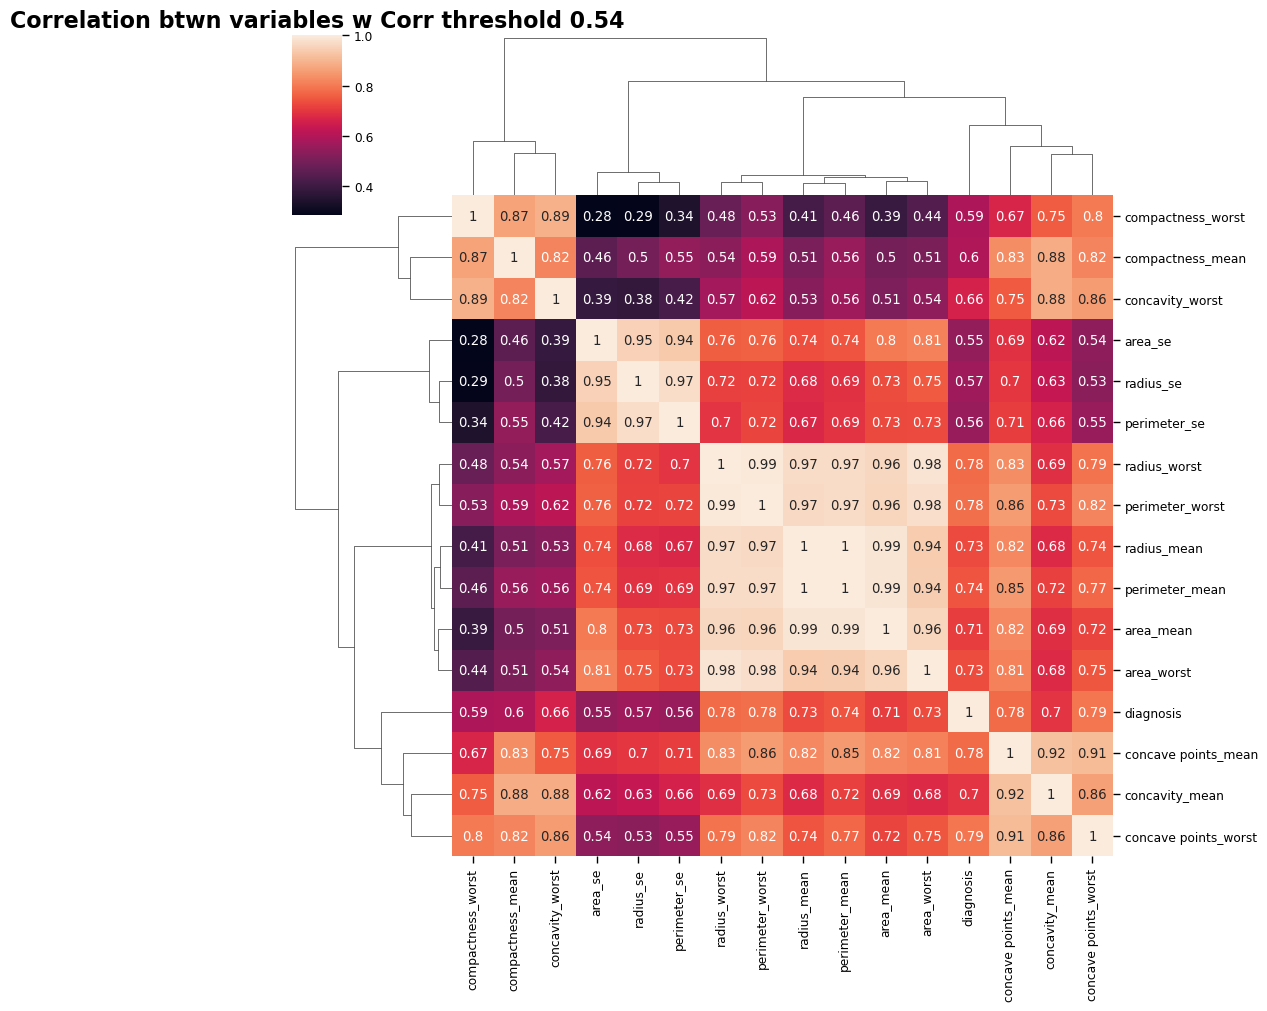

In [13]:
corr_matrix = df.corr()
# Threshold that was set above for the correlation
threshold = 0.54 
var_filter = np.abs(corr_matrix["diagnosis"]) > threshold
corr_features = corr_matrix.columns[var_filter].tolist()

# Seaborn 
sns.set_context("paper", font_scale=1)
sns.clustermap(df[corr_features].corr(), annot = True)
plt.title("Correlation btwn variables w Corr threshold 0.54", fontweight = "bold", fontsize=16)
plt.show()

From the clustermap above, only the variables correlated diagnosis above 0.54 are plotted.<br>
It can be seen that some variables have a high correlation with each other.

## Training the classifiers

### Prepare the input

In [14]:
X = df.drop(["diagnosis"], axis = 1)
y = df["diagnosis"]
cols = df.columns.tolist()

### Train, test, split

In [15]:
# Split the data into training 70% and testing 30%
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state = 16)

# The scaler has to be included for logistic regression, otherwise an iteration error is thrown
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

### Decision Tree

The code below produces a decision tree classifier based on the training data.<br>
It uses [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to determine the best parameters for an estimator.<br>

In [16]:
dec_tree = DecisionTreeClassifier(random_state=10)

parameters = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : range(1, 32, 1),
    'min_samples_leaf' : range(1, 10, 1),
    
    #If 1 is entered, throws ValueError
    'min_samples_split' : range(2, 10, 1),
    'splitter' : ['best', 'random']
}

# cv = cross-fold validation. Defaults to 5
# n_jobs = number of jobs to run in parallel. -1 means uses all processors
gs_dec_tree = GridSearchCV(dec_tree, parameters, cv = 5, n_jobs = -1, verbose = 1)
gs_dec_tree.fit(X_train, y_train)

Fitting 5 folds for each of 8928 candidates, totalling 44640 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=10), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']},
             verbose=1)

Get the best parameters from GridSearchCV:

In [17]:
# Best parameters from GridSearchCV
gs_dec_tree.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 9,
 'min_samples_split': 2,
 'splitter': 'random'}

Get the best score from GridSearchCV:

In [18]:
# Get the best score from GridSearchCV
gs_dec_tree.best_score_

0.9573417721518986

Use the best parameters above to put into the classifer again:

In [19]:
dec_tree = DecisionTreeClassifier(criterion = 'entropy', 
                                  max_depth = 5, 
                                  min_samples_leaf = 6, 
                                  min_samples_split = 2, 
                                  splitter = 'random')
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=6,
                       splitter='random')

Test the classifier and test the performance with an accuracy score for the training and testing, as well as the confusion matrix for the decision tree.

In [20]:
# Assign a variable to the testing portion
y_pred = dec_tree.predict(X_test)

In [21]:
# Print the training score
print("Training score:")
print(accuracy_score(y_train, dec_tree.predict(X_train)))

# Print the predicted score
print("\nPrediction score:")
dec_tree_acc = accuracy_score(y_test, dec_tree.predict(X_test))
print(dec_tree_acc)

# Print the confusion matrix:
print("\nThe confusion matrix for the decision tree:")
print(confusion_matrix(y_test, y_pred))

Training score:
0.9673366834170855

Prediction score:
0.9239766081871345

The confusion matrix for the decision tree:
[[101   5]
 [  8  57]]


Get the benchmark for the classifier:

In [22]:
# Print the classifier report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       106
           1       0.92      0.88      0.90        65

    accuracy                           0.92       171
   macro avg       0.92      0.91      0.92       171
weighted avg       0.92      0.92      0.92       171



### Random Forest

The code below defines a [Random Forest classifier](https://scikit-learn.org/stable/modules/ensemble.html#random-forests).

In [23]:
# Defining a Random Forest Classifer.
# Values were taken from the code example in scikit learn
# n_estimators = number of trees in the forest (decision trees)
# max_depth = 
rfc = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
# Pass in training values
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [24]:
# Define a model and pass in testing values
y_pred = rfc.predict(X_test)

In [25]:
# Print the accuracy score from training and predicted values

print("The accuracy score from the training values:")
print(accuracy_score(y_train, rfc.predict(X_train)))

print("\nThe accuracy score from the predicted values:")
rfc_clf_acc = accuracy_score(y_test, y_pred)
print(rfc_clf_acc)

print("\nThe confusion matrix for the random forest classifier:")
print(confusion_matrix(y_test, y_pred))

The accuracy score from the training values:
0.9949748743718593

The accuracy score from the predicted values:
0.9707602339181286

The confusion matrix for the random forest classifier:
[[105   1]
 [  4  61]]


Clearly, an accuracy of 1.0 just seems wrong, but everything else seems ok.<br>
The classifier benchmarks are printed below.<br>

In [26]:
# Print the classifier report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       106
           1       0.98      0.94      0.96        65

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



### Logistic Regression

The code below defines a [Logistic Regression Classifier](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression).

In [27]:
# Define a logistic Regession model
log_reg = LogisticRegression()

# Pass in the training data
log_reg.fit(X_train, y_train)

LogisticRegression()

In [28]:
# Get the predicted values
y_pred = log_reg.predict(X_test)

In [29]:
# Get the accuracy score from the training and testing values and the confusion matrix
print("The accuracy score from the training values:")
print(accuracy_score(y_train, log_reg.predict(X_train)))

print("\nThe accuracy score from the predicted values:")
log_reg_acc = accuracy_score(y_test, log_reg.predict(X_test))
print(log_reg_acc)

print("\nThe confusion matrix for the Logistic Regression classifier:")
print(confusion_matrix(y_test, y_pred))

The accuracy score from the training values:
0.992462311557789

The accuracy score from the predicted values:
0.9649122807017544

The confusion matrix for the Logistic Regression classifier:
[[104   2]
 [  4  61]]


Print out the classifier report.

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       106
           1       0.97      0.94      0.95        65

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



Very good prediction from default values of the Logistic Regression classifier.

### K Nearest Neighbors

The code below defines a [KNN classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).<br>
See the documentation for the default values used in the KNN classifier.

In [31]:
# Define an instance of KNN classifier
# Number of neighbours is 5 by default
# weights are 'uniform' by default - i.e. all points weighted equally.
# p (power parameter) is 2 by default
knn = KNeighborsClassifier()

# Pass in training values
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [32]:
# pass in test values
y_pred = knn.predict(X_test)

In [33]:
# Get the accuracy score from the training and testing values and the confusion matrix

print("The accuracy score from the training values:")
print(accuracy_score(y_train, knn.predict(X_train)))

print("\nThe accuracy score from the predicted values:")
knn_acc = accuracy_score(y_test, knn.predict(X_test))
print(knn_acc)

print("\nThe confusion matrix for the KNN classifier:")
print(confusion_matrix(y_test, y_pred))

The accuracy score from the training values:
0.9798994974874372

The accuracy score from the predicted values:
0.9649122807017544

The confusion matrix for the KNN classifier:
[[104   2]
 [  4  61]]


Finally, print the classifier report:

In [34]:
# Classifier report for KNN:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       106
           1       0.97      0.94      0.95        65

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



### Support Vector Classifier (SVC)

The code below defines a [Support Vector Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).

In [35]:
# Define a Support Vector Classifier
svc = SVC()

# Pass in training values
svc.fit(X_train, y_train)

SVC()

In [36]:
# pass in test values
y_pred = svc.predict(X_test)

In [37]:
# Get the accuracy score from the training and testing values and the confusion matrix

print("The accuracy score from the training values:")
print(accuracy_score(y_train, svc.predict(X_train)))

print("\nThe accuracy score from the predicted values:")
svc_acc = accuracy_score(y_test, svc.predict(X_test))
print(svc_acc)

print("\nThe confusion matrix for the Support Vector classifier:")
print(confusion_matrix(y_test, y_pred))

The accuracy score from the training values:
0.9874371859296482

The accuracy score from the predicted values:
0.9707602339181286

The confusion matrix for the Support Vector classifier:
[[104   2]
 [  3  62]]


Finally, print the classifier report:

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       106
           1       0.97      0.95      0.96        65

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



### Optimising the classifiers

To try and optimise the classifiers, only the variables with a correlation of above 0.54 with diagnosis will be used.

In [39]:
drop_list_var = df.corr()[abs(df.corr()['diagnosis']) < 0.54].index
drop_list_var

Index(['texture_mean', 'smoothness_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'texture_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'texture_worst', 'smoothness_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [111]:
X = df.drop(drop_list_var, axis=1)
X

,diagnosis,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,radius_se,perimeter_se,area_se,radius_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst
0,1,17.99,122.80,1001.0,0.27760,0.30010,0.14710,1.0950,8.589,153.40,25.380,184.60,2019.0,0.66560,0.7119,0.2654
1,1,20.57,132.90,1326.0,0.07864,0.08690,0.07017,0.5435,3.398,74.08,24.990,158.80,1956.0,0.18660,0.2416,0.1860
2,1,19.69,130.00,1203.0,0.15990,0.19740,0.12790,0.7456,4.585,94.03,23.570,152.50,1709.0,0.42450,0.4504,0.2430
3,1,11.42,77.58,386.1,0.28390,0.24140,0.10520,0.4956,3.445,27.23,14.910,98.87,567.7,0.86630,0.6869,0.2575
4,1,20.29,135.10,1297.0,0.13280,0.19800,0.10430,0.7572,5.438,94.44,22.540,152.20,1575.0,0.20500,0.4000,0.1625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,142.00,1479.0,0.11590,0.24390,0.13890,1.1760,7.673,158.70,25.450,166.10,2027.0,0.21130,0.4107,0.2216
565,1,20.13,131.20,1261.0,0.10340,0.14400,0.09791,0.7655,5.203,99.04,23.690,155.00,1731.0,0.19220,0.3215,0.1628
566,1,16.60,108.30,858.1,0.10230,0.09251,0.05302,0.4564,3.425,48.55,18.980,126.70,1124.0,0.30940,0.3403,0.1418
567,1,20.60,140.10,1265.0,0.27700,0.35140,0.15200,0.7260,5.772,86.22,25.740,184.60,1821.0,0.86810,0.9387,0.2650


### Plot variables against diagnosis

Now the variables can be plotted against diagnosis, to get a visual viewpoint of the variables versus diagnosis.<br>
Variables are listed on the x-axis and the count of the variables on the y-axis.

Below are the 16 variables above, plotted according to diagnosis; Red for positive and blue for negative.

In [113]:
# Try to plot only the 16 variables
#pos_counts = df["diagnosis"]._get_value(1)
pos_counts = X["diagnosis"].value_counts()
print(f'{pos_counts}')
pos_only = X.loc[X['diagnosis'] == 1]
#print(pos_only)
#r_m_pos = [df["diagnosis"]]


0    357
1    212
Name: diagnosis, dtype: int64


Below are the trigger points between a negative and positive diagnosis.

In [131]:
# Below is commented out because it was integrated with the plots
#for i in pos_only[1:]:
#    pos_var = df[i][df["diagnosis"] == 1]
#    print(i)
#    print(f'Mean: {pos_var.mean()}')
#    print(f'Std: {pos_var.std()}')
#    print(f'Mean minus std (for lower boundary):{pos_var.mean()-pos_var.std()} \n')
#    lower_bound = {pos_var.mean()-pos_var.std()}

diagnosis
Mean: 1.0
Std: 0.0
Mean minus std (for lower boundary):1.0 



<Figure size 2000x1000 with 0 Axes>

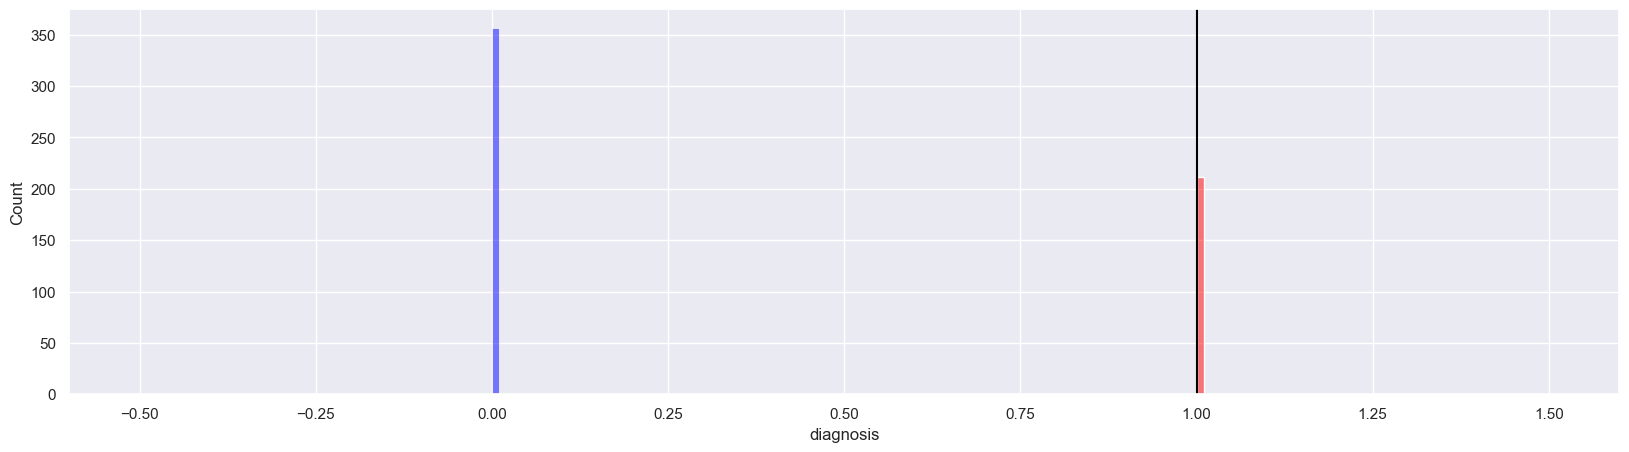

radius_mean
Mean: 17.46283018867925
Std: 3.2039711007793663
Mean minus std (for lower boundary):14.258859087899882 



<Figure size 2000x500 with 0 Axes>

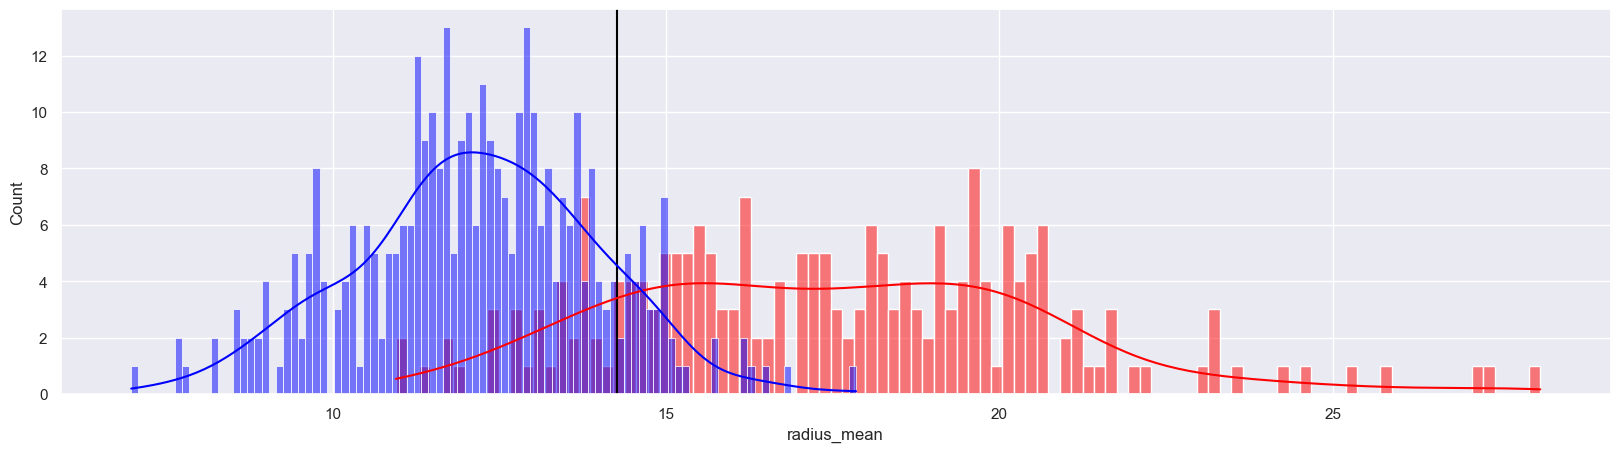

perimeter_mean
Mean: 115.36537735849062
Std: 21.85465329107372
Mean minus std (for lower boundary):93.5107240674169 



<Figure size 2000x500 with 0 Axes>

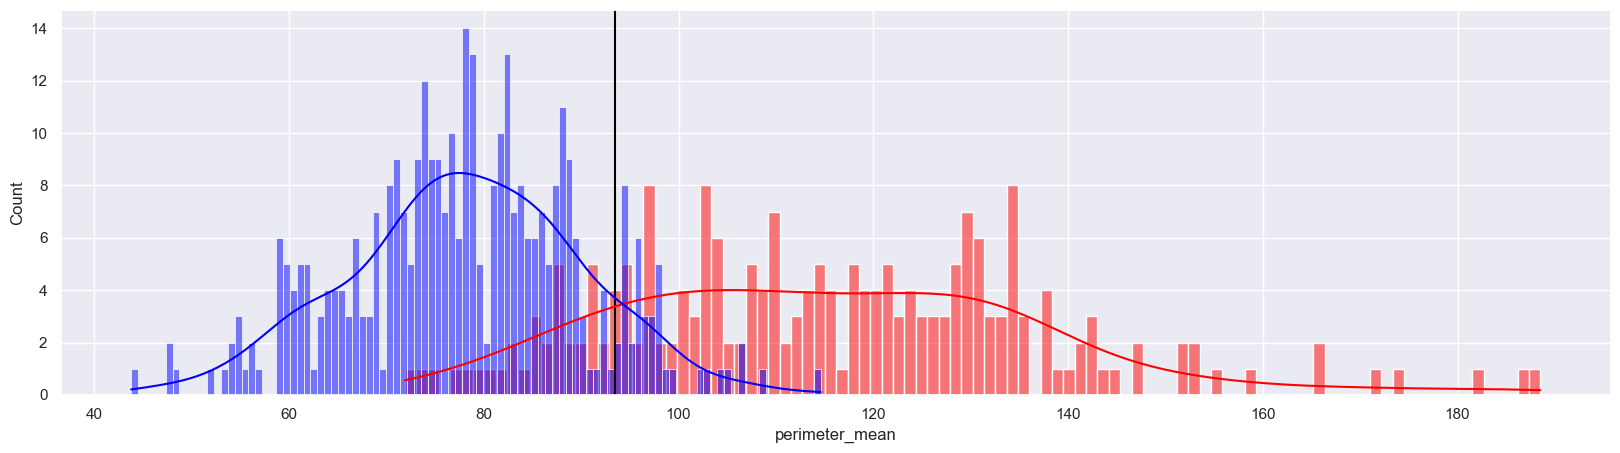

area_mean
Mean: 978.3764150943397
Std: 367.9379776066702
Mean minus std (for lower boundary):610.4384374876695 



<Figure size 2000x500 with 0 Axes>

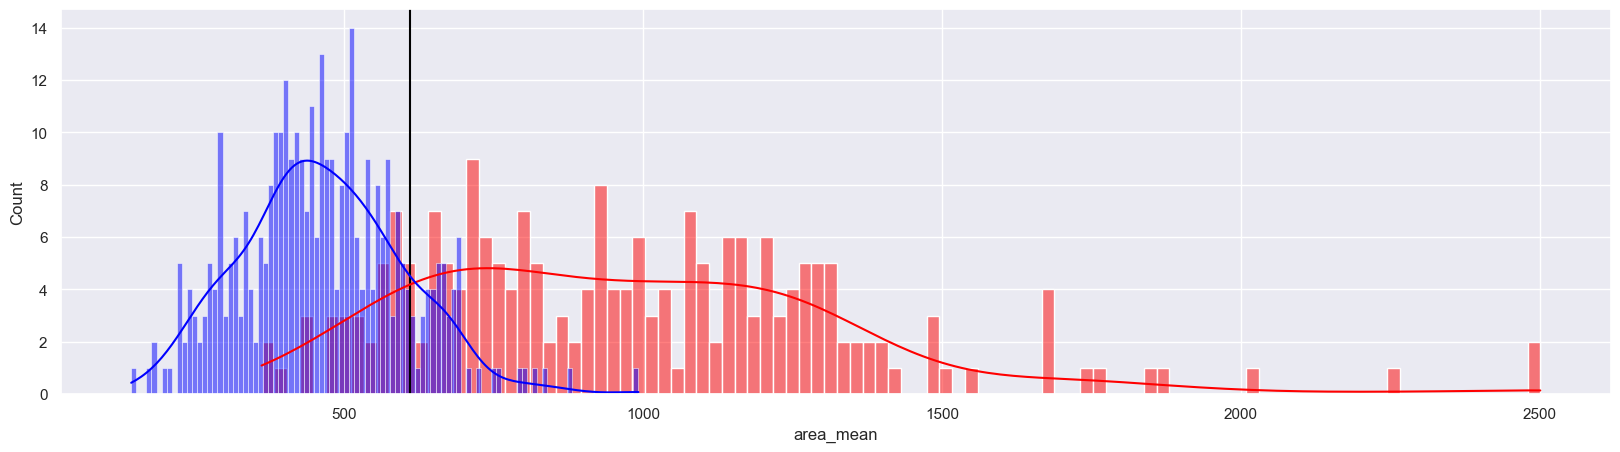

compactness_mean
Mean: 0.14518778301886787
Std: 0.05398749505279829
Mean minus std (for lower boundary):0.09120028796606958 



<Figure size 2000x500 with 0 Axes>

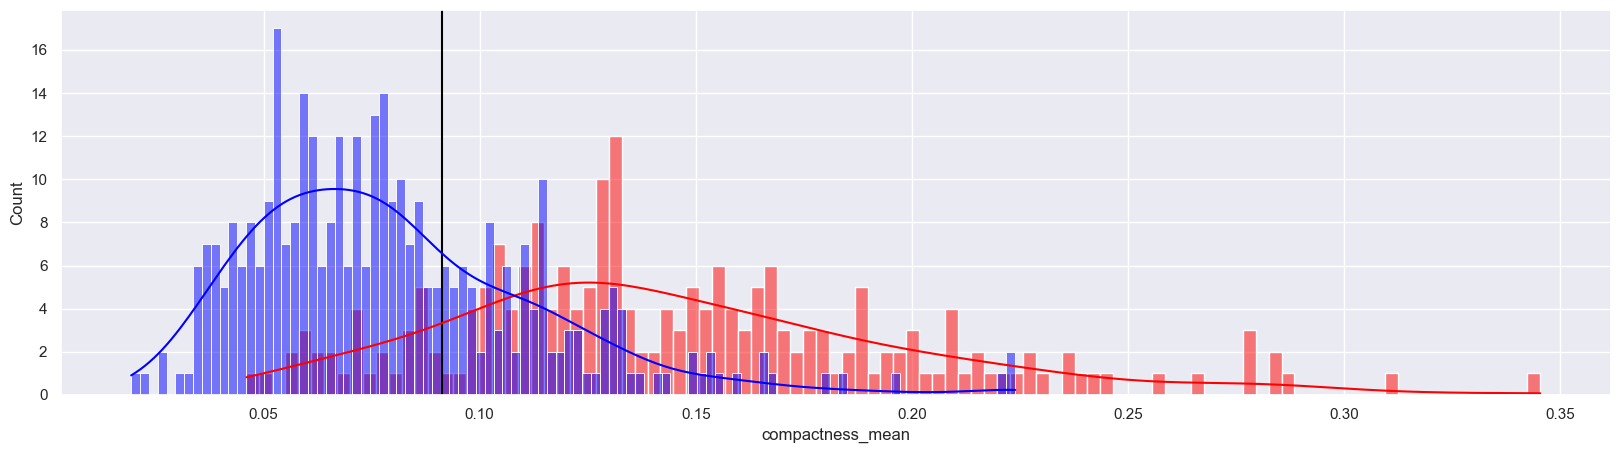

concavity_mean
Mean: 0.1607747169811321
Std: 0.07501932785025706
Mean minus std (for lower boundary):0.08575538913087505 



<Figure size 2000x500 with 0 Axes>

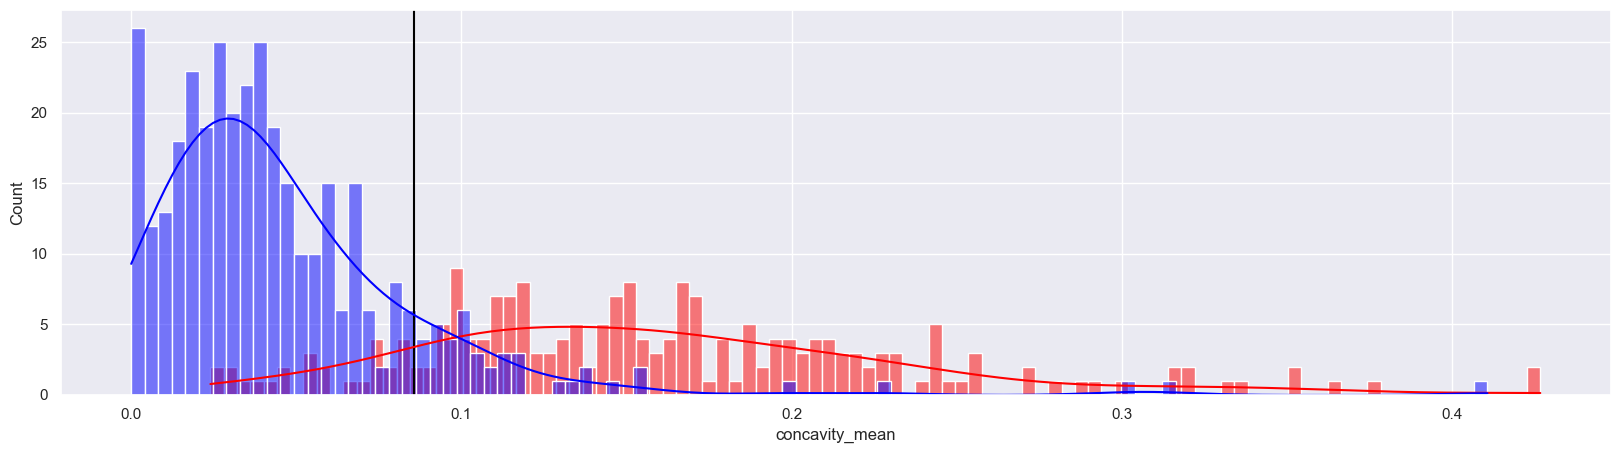

concave points_mean
Mean: 0.08799000000000004
Std: 0.03437390887540152
Mean minus std (for lower boundary):0.053616091124598524 



<Figure size 2000x500 with 0 Axes>

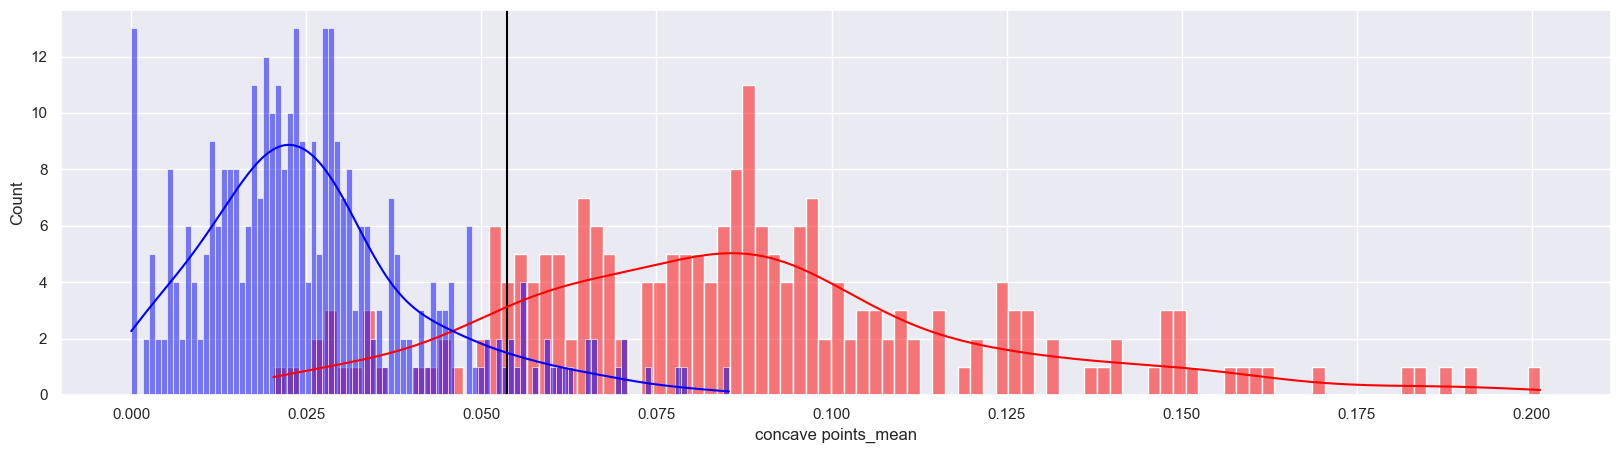

radius_se
Mean: 0.6090825471698114
Std: 0.3450385808871092
Mean minus std (for lower boundary):0.26404396628270216 



<Figure size 2000x500 with 0 Axes>

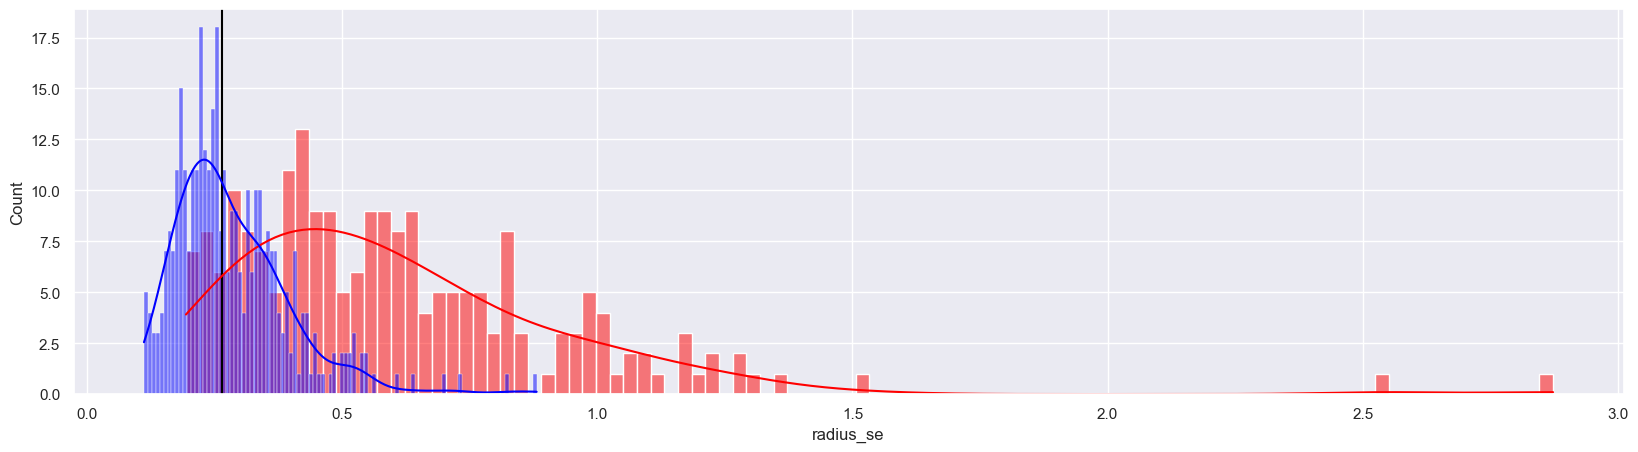

perimeter_se
Mean: 4.323929245283021
Std: 2.5685456540541707
Mean minus std (for lower boundary):1.7553835912288505 



<Figure size 2000x500 with 0 Axes>

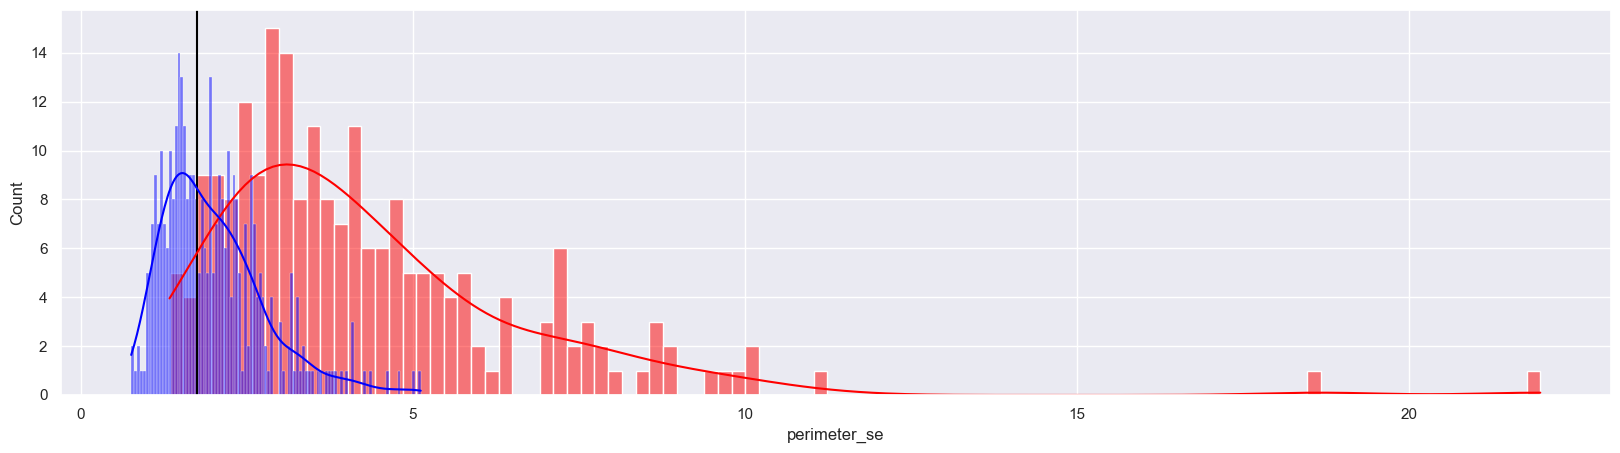

area_se
Mean: 72.67240566037735
Std: 61.35526840853968
Mean minus std (for lower boundary):11.317137251837671 



<Figure size 2000x500 with 0 Axes>

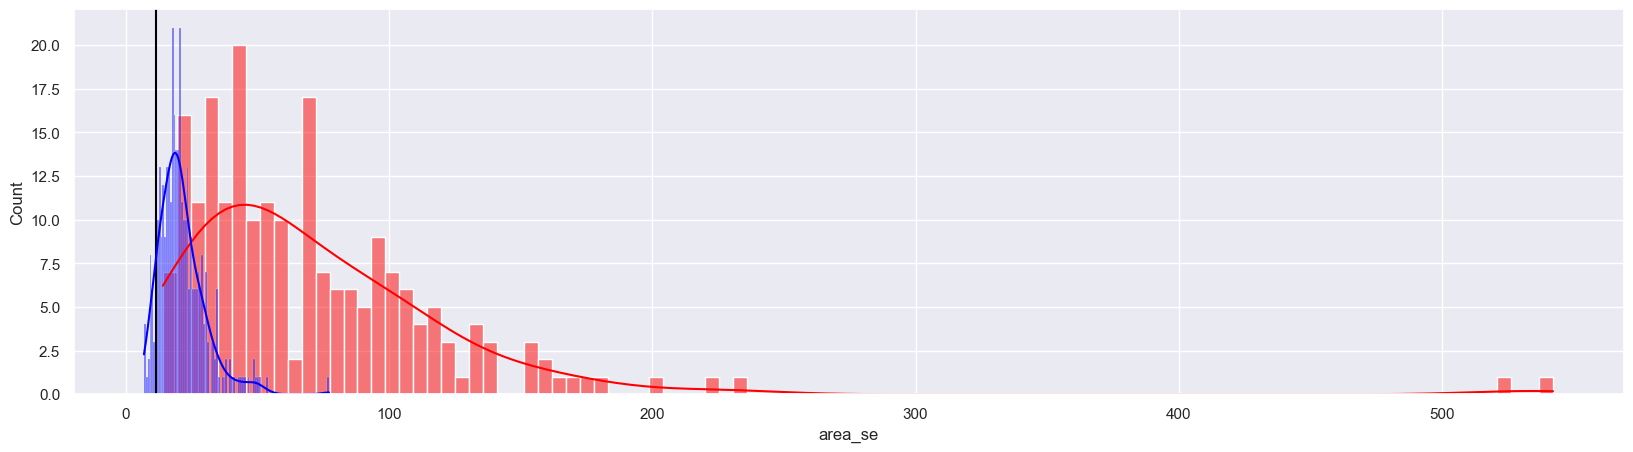

radius_worst
Mean: 21.134811320754707
Std: 4.283569453482648
Mean minus std (for lower boundary):16.85124186727206 



<Figure size 2000x500 with 0 Axes>

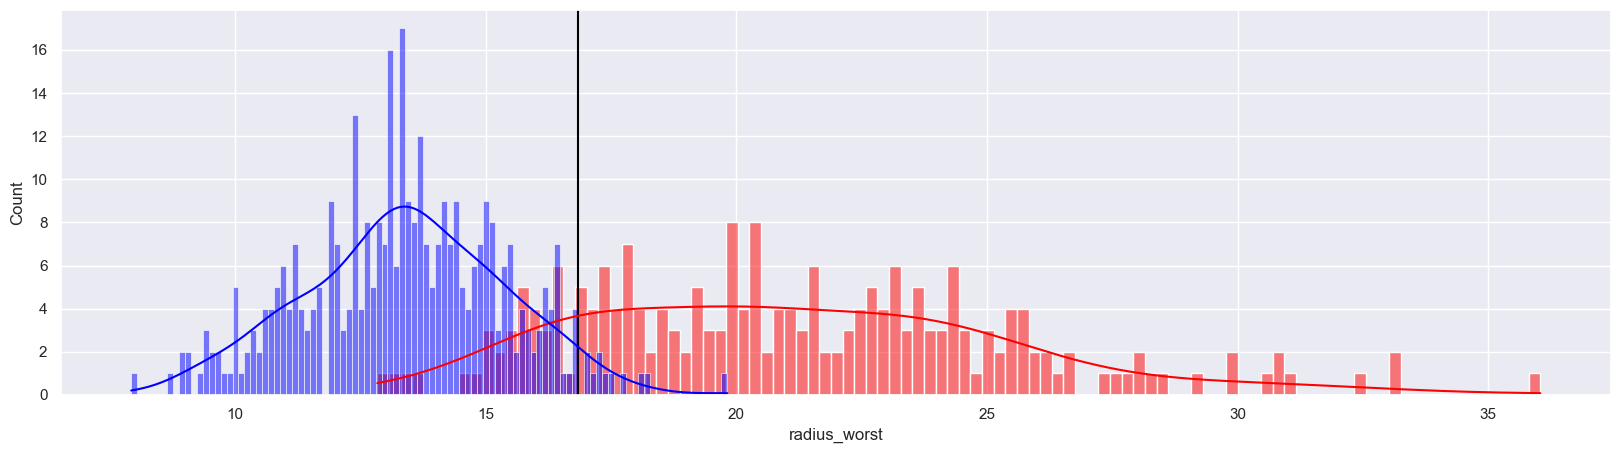

perimeter_worst
Mean: 141.37033018867922
Std: 29.457055164129887
Mean minus std (for lower boundary):111.91327502454934 



<Figure size 2000x500 with 0 Axes>

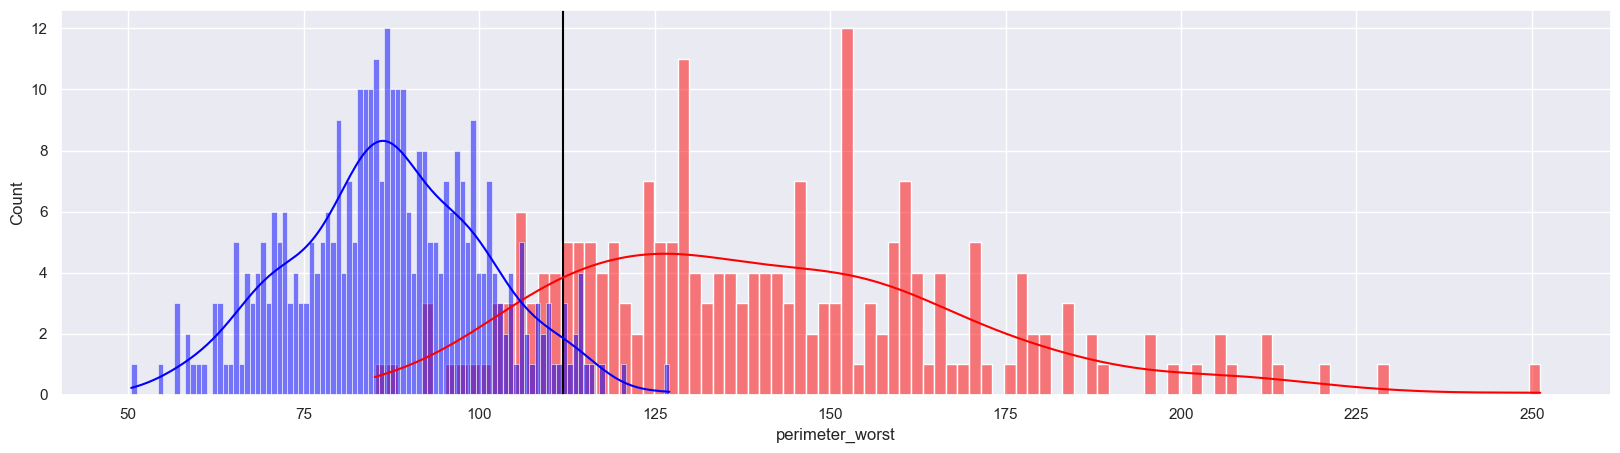

area_worst
Mean: 1422.286320754717
Std: 597.9677431516737
Mean minus std (for lower boundary):824.3185776030433 



<Figure size 2000x500 with 0 Axes>

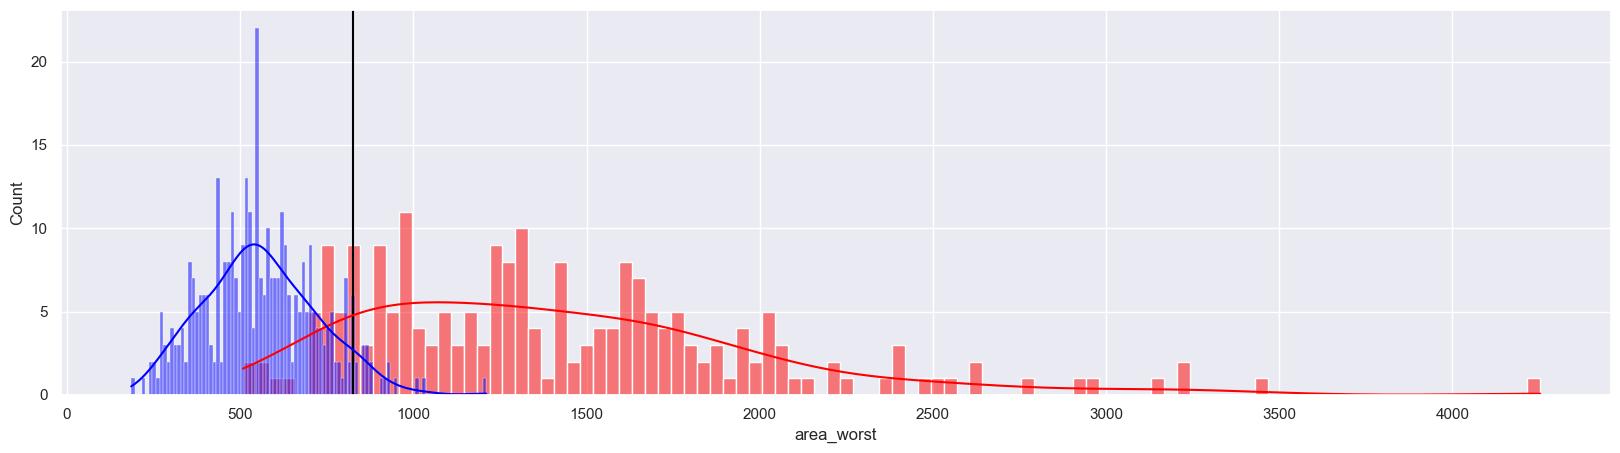

compactness_worst
Mean: 0.374824103773585
Std: 0.17037198471571027
Mean minus std (for lower boundary):0.20445211905787472 



<Figure size 2000x500 with 0 Axes>

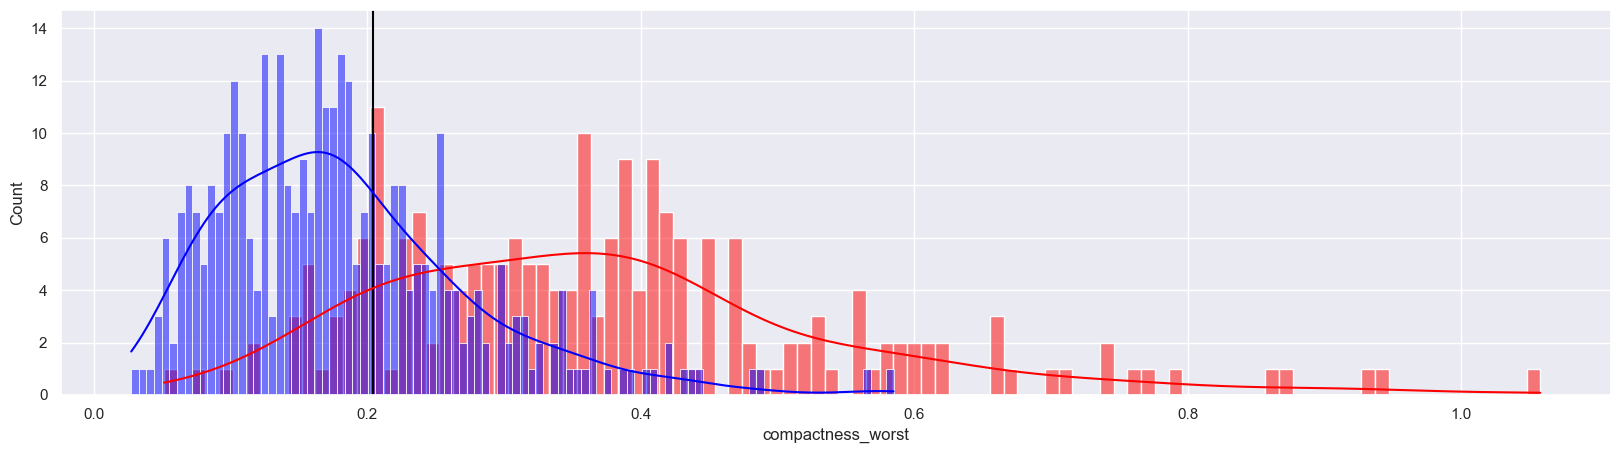

concavity_worst
Mean: 0.4506055660377357
Std: 0.18150672252420566
Mean minus std (for lower boundary):0.2690988435135301 



<Figure size 2000x500 with 0 Axes>

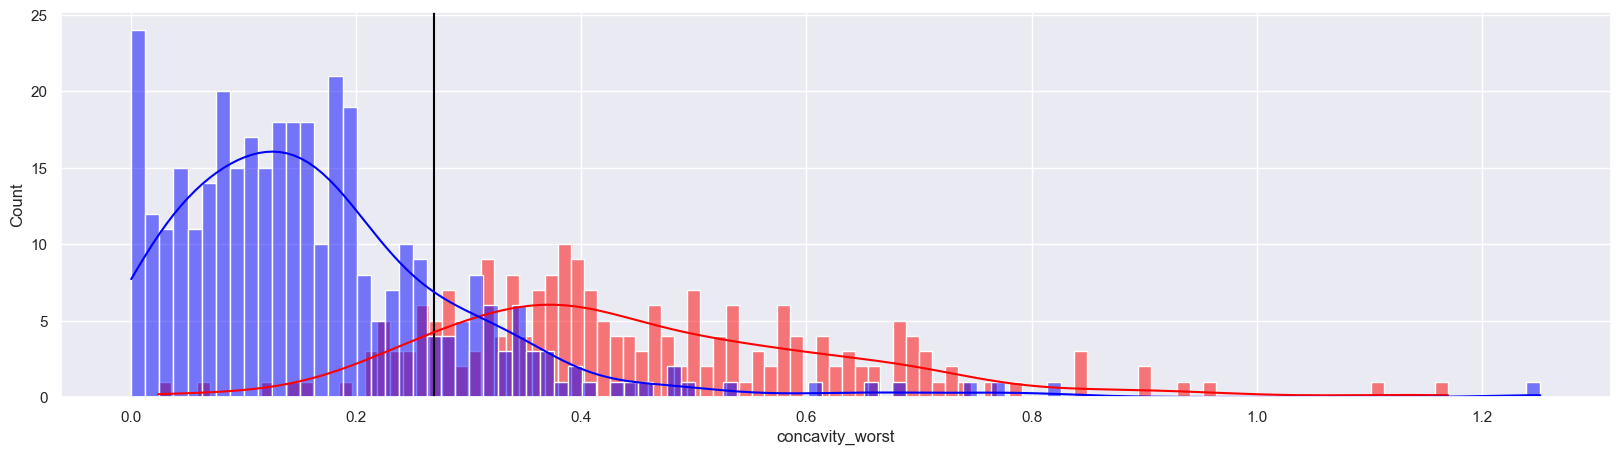

concave points_worst
Mean: 0.18223731132075477
Std: 0.04630779007517737
Mean minus std (for lower boundary):0.1359295212455774 



<Figure size 2000x500 with 0 Axes>

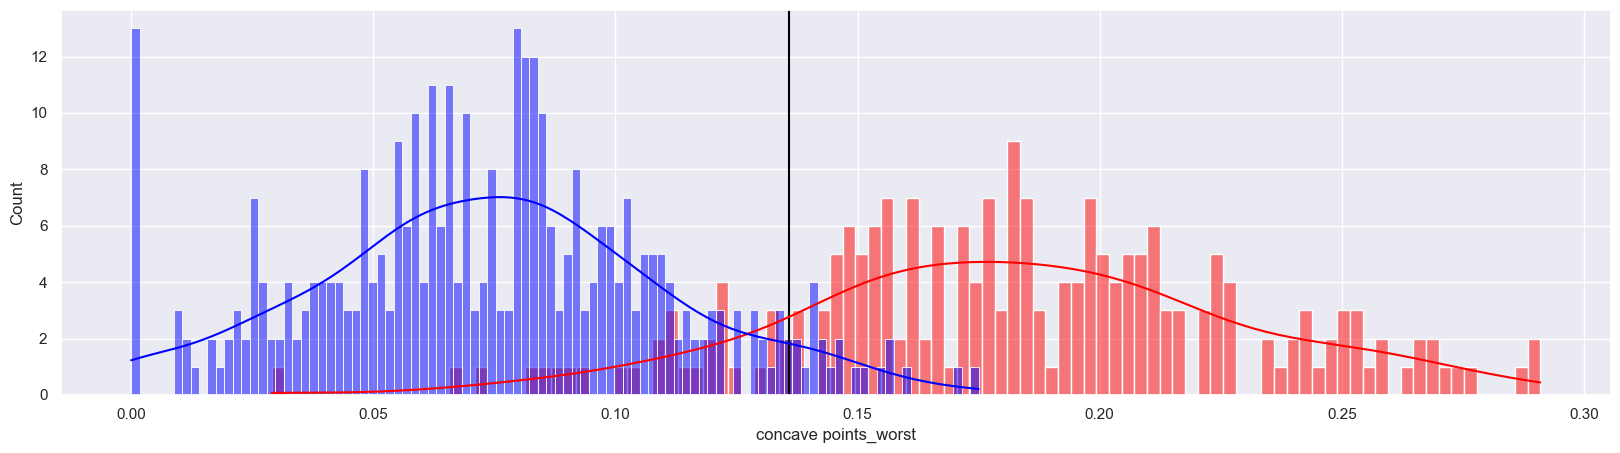

In [153]:
# Plot the 16 variables correlated with diagnosis
for i in pos_only[1:]:
    pos_var = df[i][df["diagnosis"] == 1]
    print(i)
    print(f'Mean: {pos_var.mean()}')
    print(f'Std: {pos_var.std()}')
    print(f'Mean minus std (for lower boundary):{pos_var.mean()-pos_var.std()} \n')
    lower_bound = {pos_var.mean()-pos_var.std()}
    # Plotting
    #fig, (ax) = plt.subplots(8, 2)
    plt.figure()
    plt.tight_layout()
    #
    #ax.set(title=f'{df[i]}')
    #
    #fig,ax_hist=plt.subplots(nrows=8, ncols=2,figsize=(20,5))
    sns.set(rc={"figure.figsize":(20, 5)})
    f, (ax_hist) = plt.subplots(1, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Count')
    #ax.set_title(label=f'{df[i]}')
    #ax.set_title(f'{df[i]} for positive and negative', fontsize=15)
    plt.axvline((pos_var.mean()-pos_var.std()), color='black')
    ax = sns.histplot(df[i][df["diagnosis"] == 1], color='red', ax=ax_hist, bins = 100, kde=True);
    ax = sns.histplot(df[i][df["diagnosis"] == 0], color='blue', ax=ax_hist , bins = 100, kde=True);
    plt.show()

Prepare the training data again:

In [41]:
X = X.drop(["diagnosis"], axis = 1)
y = df["diagnosis"]
cols = df.columns.tolist()

In [42]:
X

,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,radius_se,perimeter_se,area_se,radius_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst
0,17.99,122.80,1001.0,0.27760,0.30010,0.14710,1.0950,8.589,153.40,25.380,184.60,2019.0,0.66560,0.7119,0.2654
1,20.57,132.90,1326.0,0.07864,0.08690,0.07017,0.5435,3.398,74.08,24.990,158.80,1956.0,0.18660,0.2416,0.1860
2,19.69,130.00,1203.0,0.15990,0.19740,0.12790,0.7456,4.585,94.03,23.570,152.50,1709.0,0.42450,0.4504,0.2430
3,11.42,77.58,386.1,0.28390,0.24140,0.10520,0.4956,3.445,27.23,14.910,98.87,567.7,0.86630,0.6869,0.2575
4,20.29,135.10,1297.0,0.13280,0.19800,0.10430,0.7572,5.438,94.44,22.540,152.20,1575.0,0.20500,0.4000,0.1625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,142.00,1479.0,0.11590,0.24390,0.13890,1.1760,7.673,158.70,25.450,166.10,2027.0,0.21130,0.4107,0.2216
565,20.13,131.20,1261.0,0.10340,0.14400,0.09791,0.7655,5.203,99.04,23.690,155.00,1731.0,0.19220,0.3215,0.1628
566,16.60,108.30,858.1,0.10230,0.09251,0.05302,0.4564,3.425,48.55,18.980,126.70,1124.0,0.30940,0.3403,0.1418
567,20.60,140.10,1265.0,0.27700,0.35140,0.15200,0.7260,5.772,86.22,25.740,184.60,1821.0,0.86810,0.9387,0.2650


In [43]:
# Split the data into training 70% and testing 30%
# Random state also increased to 32
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state = 32)

# The scaler has to be included for logistic regression, otherwise an iteration error is thrown
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

This time round, the classifiers can be put into a Python dictionary with key-value pairs and then run.<br>
The same classifiers will be evaluated again:
- Decision Tree
- Random Forest
- Logistic Regression
- KNN
- SVC

In [44]:
key = ['DecisionTreeClassifier', 
       'RandomForestClassifier',
       'LogisticRegression',
       'KNeighborsClassifier',
       'SVC']
value = [DecisionTreeClassifier(random_state=20),
         RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=20),
         LogisticRegression(), 
         KNeighborsClassifier(), 
         SVC()]
models = dict(zip(key,value))
models

{'DecisionTreeClassifier': DecisionTreeClassifier(random_state=20),
 'RandomForestClassifier': RandomForestClassifier(n_estimators=10, random_state=20),
 'LogisticRegression': LogisticRegression(),
 'KNeighborsClassifier': KNeighborsClassifier(),
 'SVC': SVC()}

In [45]:
predicted =[]
for name,algo in models.items():
    model=algo
    model.fit(X_train,y_train)
    predict = model.predict(X_test)
    acc = accuracy_score(y_test, predict)
    predicted.append(acc)
    print(name,acc)

DecisionTreeClassifier 0.9122807017543859
RandomForestClassifier 0.935672514619883
LogisticRegression 0.935672514619883
KNeighborsClassifier 0.9122807017543859
SVC 0.9181286549707602


The best classifiers are Random Forest and Logistic Regresssion (exactly the same?) so parameters on those will be changed to try and optimise them further; however, the other classifiers will also be run if the input parameters are optimised, i.e. if the *random_state* variable is changed for train, test split<br>



### Change random_state variable

The parameter *random_state* is a pseudo-random number parameter that allows the user to produce the same train-test-split each time the code is run.<br>

In [46]:
# Split the data into training 70% and testing 30%
# Random state changed to 0
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state = 0)

# The scaler has to be included for logistic regression, otherwise an iteration error is thrown
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [47]:
key = ['DecisionTreeClassifier', 
       'RandomForestClassifier',
       'LogisticRegression',
       'KNeighborsClassifier',
       'SVC']
value = [DecisionTreeClassifier(random_state=20),
         RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=20),
         LogisticRegression(), 
         KNeighborsClassifier(), 
         SVC()]
models = dict(zip(key,value))
models

{'DecisionTreeClassifier': DecisionTreeClassifier(random_state=20),
 'RandomForestClassifier': RandomForestClassifier(n_estimators=10, random_state=20),
 'LogisticRegression': LogisticRegression(),
 'KNeighborsClassifier': KNeighborsClassifier(),
 'SVC': SVC()}

In [48]:
predicted =[]
for name,algo in models.items():
    model=algo
    model.fit(X_train,y_train)
    predict = model.predict(X_test)
    acc = accuracy_score(y_test, predict)
    predicted.append(acc)
    print(name,acc)

DecisionTreeClassifier 0.9239766081871345
RandomForestClassifier 0.935672514619883
LogisticRegression 0.9298245614035088
KNeighborsClassifier 0.9181286549707602
SVC 0.9122807017543859


The *Decision Tree* classifier improved slightly.

### Change individual classifier parameters

In [49]:
key = ['DecisionTreeClassifier', 
       'RandomForestClassifier',
       'LogisticRegression',
       'KNeighborsClassifier',
       'SVC']
value = [DecisionTreeClassifier(random_state=32),
         RandomForestClassifier(n_estimators=32, max_depth=None, min_samples_split=2, random_state=32),
         LogisticRegression(random_state=32, solver="liblinear"), 
         KNeighborsClassifier(), 
         SVC()]
models = dict(zip(key,value))
models

{'DecisionTreeClassifier': DecisionTreeClassifier(random_state=32),
 'RandomForestClassifier': RandomForestClassifier(n_estimators=32, random_state=32),
 'LogisticRegression': LogisticRegression(random_state=32, solver='liblinear'),
 'KNeighborsClassifier': KNeighborsClassifier(),
 'SVC': SVC()}

In [50]:
predicted =[]
for name,algo in models.items():
    model=algo
    model.fit(X_train,y_train)
    predict = model.predict(X_test)
    acc = accuracy_score(y_test, predict)
    predicted.append(acc)
    print(name,acc)

DecisionTreeClassifier 0.9415204678362573
RandomForestClassifier 0.9415204678362573
LogisticRegression 0.9298245614035088
KNeighborsClassifier 0.9181286549707602
SVC 0.9122807017543859


### Optimise again

The *Decision Tree* and *Random Forest* will be optimised again.<br>
The *random_state* parameter ensures that the results are repeatable, whereas the *max_depth* parameter is the maximum depth of the tree.<br>
The theoretical maximum is (training samples -1) but overfitting will happen at this point.<br>


In [51]:
key = ['DecisionTreeClassifier', 
       'RandomForestClassifier',
       'LogisticRegression',
       'KNeighborsClassifier',
       'SVC']
value = [DecisionTreeClassifier(max_depth = 3, min_samples_split=21, random_state=64),
         RandomForestClassifier(n_estimators=128, max_depth=None, max_features="auto", min_samples_split=2, random_state=128),
         LogisticRegression(random_state=128, solver="liblinear"), 
         KNeighborsClassifier(), 
         SVC()]
models = dict(zip(key,value))
models

{'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=3, min_samples_split=21, random_state=64),
 'RandomForestClassifier': RandomForestClassifier(n_estimators=128, random_state=128),
 'LogisticRegression': LogisticRegression(random_state=128, solver='liblinear'),
 'KNeighborsClassifier': KNeighborsClassifier(),
 'SVC': SVC()}

In [52]:
predicted =[]
for name,algo in models.items():
    model=algo
    model.fit(X_train,y_train)
    predict = model.predict(X_test)
    acc = accuracy_score(y_test, predict)
    predicted.append(acc)
    print(name,acc)

DecisionTreeClassifier 0.9532163742690059
RandomForestClassifier 0.9415204678362573
LogisticRegression 0.9298245614035088
KNeighborsClassifier 0.9181286549707602
SVC 0.9122807017543859


So the *Decision Tree* and *Random Forest* classifiers were improved by approximately 2.4% from the original run.<br>
I did in fact increase the *max_depth* parameter for the *Decision Tree*, but it actually got worse, probably due to overfitting.<br>

### Use GridSearch to optimise parameters

GridSearchCV is a tool that can be used to optimise the parameters of algorithms.<br>
First, get the parameters of the *Decision Tree* classifier.

In [53]:
print(DecisionTreeClassifier().get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


Choose the parameters to be tuned.<br>

In [54]:
dtc_parameters = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : range(2, 32, 1),
    'min_samples_leaf' : range(1, 10, 1),
    'min_samples_split' : range(2, 10, 1),
    'splitter' : ['best', 'random']
}

Now pass in the decision tree to gridsearch to optimise the parameters.<br>
Note that *cross-fold validation* was set to 10 as some of the papers had a higher value for it.

In [55]:
grid_search_dt = GridSearchCV(DecisionTreeClassifier(), dtc_parameters, cv = 10, n_jobs = -1, verbose = 1)
grid_search_dt.fit(X_train, y_train)

Fitting 10 folds for each of 8640 candidates, totalling 86400 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']},
             verbose=1)

Get the best parameters for the *Decision Tree*:

In [56]:
grid_search_dt.best_params_

{'criterion': 'entropy',
 'max_depth': 11,
 'min_samples_leaf': 4,
 'min_samples_split': 8,
 'splitter': 'random'}

Now the best parameters have been determined for the *Decision Tree*, use GridSearchCV for the rest of the classifiers.

In [57]:
print(RandomForestClassifier().get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [64]:
rf_parameters = {
    'n_estimators': [12, 24, 48, 64, 128, 256],
    'max_depth': [2, 4, 8, 12],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [2, 3, 4, 5]
}

Pass in the random forest to GridSearchCV.

In [65]:
grid_search_rf = GridSearchCV(RandomForestClassifier(), rf_parameters, cv = 10, n_jobs = -1, verbose = 1)
grid_search_rf.fit(X_train, y_train)

Fitting 10 folds for each of 384 candidates, totalling 3840 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 8, 12],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [12, 24, 48, 64, 128, 256]},
             verbose=1)

In [67]:
grid_search_rf.best_params_

{'max_depth': 12,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 24}

In [ ]:
{'max_depth': 4,
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 12}

Move on to Logistic Regression. Get the parameters and pass them into GridSearchCV.

In [68]:
print(LogisticRegression().get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [73]:
lr_parameters = {
    'max_iter': [1000],
    'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

In [74]:
grid_search_lr = GridSearchCV(LogisticRegression(), lr_parameters, cv = 10, n_jobs = -1, verbose = 1)
grid_search_lr.fit(X_train, y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'max_iter': [1000]},
             verbose=1)

Get the best parameters for logistic regression.

In [75]:
grid_search_lr.best_params_

{'C': 100, 'max_iter': 1000}

Now move onto to the KNN classifier.<br>
Get the parameters, pass into GridSearchCV and then get the best parameters from GridSearchCV.

In [78]:
print((KNeighborsClassifier().get_params()))

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


In [79]:
knn_parameters = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'p': range(2, 5),
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'weights': ['uniform', 'distance']
}

In [80]:
grid_search_knn = GridSearchCV(KNeighborsClassifier(), knn_parameters, cv = 10, n_jobs = -1, verbose = 1)
grid_search_knn.fit(X_train, y_train)

Fitting 10 folds for each of 126 candidates, totalling 1260 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
                         'p': range(2, 5), 'weights': ['uniform', 'distance']},
             verbose=1)

Get the best parameters for knn:

In [81]:
grid_search_knn.best_params_

{'metric': 'manhattan', 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}

Finally, move on to the Support Vector classifier and repeat the process above.

In [82]:
print(SVC().get_params())

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [84]:
svc_parameters = {
    'kernel': ['poly', 'sigmoid', 'rbf', 'linear'],
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001]
}

In [85]:
grid_search_svc = GridSearchCV(SVC(), svc_parameters, cv = 10, n_jobs = -1, verbose = 1)
grid_search_svc.fit(X_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['poly', 'sigmoid', 'rbf', 'linear']},
             verbose=1)

In [86]:
grid_search_svc.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

### Run classifiers with optimised parameters

Now, all these values can be 'plugged in' when running the classifiers again.

In [92]:
# Print out values again so that we have them quickly to hand
print(f'The optimised paramters for Decision Tree are: {grid_search_dt.best_params_}')
print(f'\nThe optimised paramters for Random Forest are are: {grid_search_rf.best_params_}')
print(f'\nThe optimised paramters for Logistic Regression are: {grid_search_lr.best_params_}')
print(f'\nThe optimised paramters for KNN are: {grid_search_knn.best_params_}')
print(f'\nThe optimised paramters for SVC are: {grid_search_svc.best_params_}')

The optimised paramters for Decision Tree are: {'criterion': 'entropy', 'max_depth': 11, 'min_samples_leaf': 4, 'min_samples_split': 8, 'splitter': 'random'}

The optimised paramters for Random Forest are are: {'max_depth': 12, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 24}

The optimised paramters for Logistic Regression are: {'C': 100, 'max_iter': 1000}

The optimised paramters for KNN are: {'metric': 'manhattan', 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}

The optimised paramters for SVC are: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [99]:
key = ['DecisionTreeClassifier', 
       'RandomForestClassifier',
       'LogisticRegression',
       'KNeighborsClassifier',
       'SVC']
value = [DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_leaf=4, min_samples_split=8, splitter='random'),
         RandomForestClassifier(n_estimators=24, max_depth=12, min_samples_leaf=2, min_samples_split=2),
         LogisticRegression(C=100, max_iter = 1000), 
         KNeighborsClassifier(metric = 'manhattan', n_neighbors = 5, p = 2, weights = 'uniform'), 
         SVC(C = 10, gamma = 0.1, kernel = 'rbf')]
models2 = dict(zip(key,value))
models2

{'DecisionTreeClassifier': DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_leaf=4,
                        min_samples_split=8, splitter='random'),
 'RandomForestClassifier': RandomForestClassifier(max_depth=12, min_samples_leaf=2, n_estimators=24),
 'LogisticRegression': LogisticRegression(C=100, max_iter=1000),
 'KNeighborsClassifier': KNeighborsClassifier(metric='manhattan'),
 'SVC': SVC(C=10, gamma=0.1)}

In [100]:
predicted =[]
for name,algo in models.items():
    model=algo
    model.fit(X_train,y_train)
    predict = model.predict(X_test)
    acc = accuracy_score(y_test, predict)
    predicted.append(acc)
    print(name,acc)

DecisionTreeClassifier 0.9473684210526315
RandomForestClassifier 0.9532163742690059
LogisticRegression 0.935672514619883
KNeighborsClassifier 0.9239766081871345
SVC 0.9590643274853801


Note that when using GridSearchCV one must set realistic boundaries for the parameters as it can use a lot of the working machine's memory - at least, that was the case for me.<br>

Also note that *Support Vector Classification* improved the most after optimisation, nearly 96%.

### Probability distributions of variables

Instead of going through each variable one by one, a *for loop* will be used to loop through the variables and generate probability distributions.<br>

As in the first project (synthesising wine data) the *Fitter* library will be used to determine the probability distribution for each variable.<br>

For the synthetic data another package will be used; then the synthesised data can be compared to the original data.

In [136]:
cancer_variables = df.columns.values.tolist()
cancer_variables

['diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']



Variable: diagnosis


Fitting 10 distributions: 100%|████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 17.29it/s]


          sumsquare_error         aic          bic  kl_div  ks_statistic  \
gamma         3670.368497  331.614280  1079.742613     inf      0.627417   
powerlaw      3982.538175  120.084977  1126.188537     inf      0.627416   
lognorm       4414.510352  454.023456  1184.782777     inf      0.627401   
exponpow      4970.953634   60.154811  1252.331485     inf      0.627417   
chi2          5059.865362  134.888308  1262.418817     inf      0.627417   

              ks_pvalue  
gamma     3.841765e-217  
powerlaw  3.846583e-217  
lognorm   3.947793e-217  
exponpow  3.841765e-217  
chi2      3.841765e-217  


Variable: radius_mean


Fitting 10 distributions: 100%|████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 25.79it/s]


          sumsquare_error         aic          bic  kl_div  ks_statistic  \
lognorm          0.052257  769.315088 -5270.080815     inf      0.045726   
gamma            0.056270  773.611736 -5227.985925     inf      0.055012   
cauchy           0.063962  796.092309 -5161.426039     inf      0.109057   
norm             0.094672  833.846594 -4938.304134     inf      0.112730   
rayleigh         0.101363         inf -4899.445473     inf      0.151807   

             ks_pvalue  
lognorm   1.794953e-01  
gamma     6.151236e-02  
cauchy    2.387366e-06  
norm      9.379763e-07  
rayleigh  6.494416e-12  


Variable: texture_mean


Fitting 10 distributions: 100%|████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 24.53it/s]


          sumsquare_error          aic          bic  kl_div  ks_statistic  \
chi2             0.019617   902.194355 -5827.576381     inf      0.019410   
gamma            0.019617   902.194686 -5827.576375     inf      0.019410   
lognorm          0.019632   896.049698 -5827.157064     inf      0.016919   
norm             0.023739  1020.656968 -5725.412992     inf      0.049088   
rayleigh         0.035340          inf -5499.004702     inf      0.111186   

          ks_pvalue  
chi2       0.980092  
gamma      0.980094  
lognorm    0.995991  
norm       0.124625  
rayleigh   0.000001  


Variable: perimeter_mean


Fitting 10 distributions: 100%|████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 33.40it/s]


          sumsquare_error          aic          bic  kl_div  ks_statistic  \
lognorm          0.001223  1154.423505 -7406.510767     inf      0.052412   
chi2             0.001324  1158.721779 -7361.582174     inf      0.062573   
gamma            0.001324  1158.721872 -7361.582168     inf      0.062573   
cauchy           0.001502  1184.103752 -7296.088760     inf      0.114876   
rayleigh         0.001933          inf -7152.522455     inf      0.142578   

             ks_pvalue  
lognorm   8.469674e-02  
chi2      2.222686e-02  
gamma     2.222673e-02  
cauchy    5.355850e-07  
rayleigh  1.481221e-10  


Variable: area_mean


Fitting 10 distributions: 100%|████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 17.22it/s]


          sumsquare_error          aic           bic  kl_div  ks_statistic  \
cauchy           0.000006  1841.179252 -10470.580844     inf      0.132720   
rayleigh         0.000010  1993.757079 -10133.247480     inf      0.150716   
norm             0.000015  2095.147190  -9927.327066     inf      0.155960   
expon            0.000022  1712.425414  -9696.245603     inf      0.212022   
powerlaw         0.000033  1589.594247  -9460.694447     inf      0.288314   

             ks_pvalue  
cauchy    3.356098e-09  
rayleigh  9.496522e-12  
norm      1.489678e-12  
expon     6.355475e-23  
powerlaw  2.264392e-42  


Variable: smoothness_mean


Fitting 10 distributions: 100%|████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 28.18it/s]


          sumsquare_error         aic         bic  kl_div  ks_statistic  \
gamma         1422.493478 -136.601384  540.398459     inf      0.019872   
lognorm       1426.868055 -143.122172  542.145613     inf      0.021360   
norm          1522.979264  -78.626033  572.892900     inf      0.036094   
rayleigh      2628.701062         inf  883.465262     inf      0.104786   
exponpow      3004.066315   27.869705  965.757542     inf      0.107232   

          ks_pvalue  
gamma      0.974930  
lognorm    0.952561  
norm       0.438588  
rayleigh   0.000007  
exponpow   0.000004  


Variable: compactness_mean


Fitting 10 distributions: 100%|████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 41.51it/s]


          sumsquare_error        aic         bic  kl_div  ks_statistic  \
gamma          229.350993 -22.533411 -497.977054     inf      0.035759   
chi2           229.351224 -22.539131 -497.976483     inf      0.035759   
lognorm        229.576210 -37.114621 -497.418586     inf      0.031963   
rayleigh       303.082256  55.215603 -345.711793     inf      0.092298   
exponpow       410.092297  38.168688 -167.314826     inf      0.086509   

          ks_pvalue  
gamma      0.450445  
chi2       0.450410  
lognorm    0.594780  
rayleigh   0.000114  
exponpow   0.000374  


Variable: concavity_mean


Fitting 10 distributions: 100%|████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 19.32it/s]


          sumsquare_error        aic         bic  kl_div  ks_statistic  \
lognorm        125.043871  14.470338 -843.126144     inf      0.048767   
expon          128.453433   0.359067 -834.162898     inf      0.056789   
chi2           134.790167  -9.419849 -800.420070     inf      0.059907   
gamma          173.066461  21.944991 -658.194859     inf      0.089797   
exponpow       174.977618 -10.593317 -651.945884     inf      0.066209   

          ks_pvalue  
lognorm    0.129200  
expon      0.048999  
chi2       0.032304  
gamma      0.000192  
exponpow   0.013003  


Variable: concave points_mean


Fitting 10 distributions: 100%|████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 26.35it/s]


          sumsquare_error         aic         bic  kl_div  ks_statistic  \
lognorm        915.153116 -163.694974  289.426676     inf      0.058225   
gamma          970.127534 -168.481027  322.619945     inf      0.064844   
chi2           970.127558 -168.481703  322.619959     inf      0.064842   
exponpow      1244.325763 -162.728892  464.256316     inf      0.112541   
cauchy        1340.467941  -77.829082  500.260223     inf      0.171781   

             ks_pvalue  
lognorm   4.055462e-02  
gamma     1.595914e-02  
chi2      1.596457e-02  
exponpow  9.850037e-07  
cauchy    3.762098e-15  


Variable: symmetry_mean


Fitting 10 distributions: 100%|████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 30.00it/s]


         sumsquare_error         aic         bic  kl_div  ks_statistic  \
lognorm       375.976943  -84.453190 -216.734996     inf      0.028504   
gamma         380.633335  -77.366711 -209.731336     inf      0.031638   
chi2          380.633391  -77.366801 -209.731253     inf      0.031638   
norm          474.303269  -20.553734  -90.889305     inf      0.051516   
cauchy        820.608270 -151.805824  221.035887     inf      0.094377   

         ks_pvalue  
lognorm   0.733127  
gamma     0.607780  
chi2      0.607780  
norm      0.094230  
cauchy    0.000073  


Variable: fractal_dimension_mean


Fitting 10 distributions: 100%|████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 31.10it/s]


          sumsquare_error         aic          bic  kl_div  ks_statistic  \
lognorm       9205.361140 -382.197150  1602.934689     inf      0.023240   
rayleigh     11590.245989 -325.217892  1727.675796     inf      0.057148   
cauchy       15701.969084 -392.428206  1900.436852     inf      0.107086   
norm         15822.578699 -186.683483  1904.790742     inf      0.094720   
expon        53435.957094 -497.224451  2597.289871     inf      0.245989   

             ks_pvalue  
lognorm   9.111845e-01  
rayleigh  4.675644e-02  
cauchy    3.891321e-06  
norm      6.795971e-05  
expon     8.295862e-31  


Variable: radius_se


Fitting 10 distributions: 100%|████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 29.98it/s]


         sumsquare_error         aic          bic  kl_div  ks_statistic  \
lognorm         1.373491  686.816327 -3410.060945     inf      0.026132   
gamma           3.827619  905.527322 -2826.900082     inf      0.059087   
chi2            3.827691  905.523885 -2826.889455     inf      0.059086   
cauchy          7.570089  647.871826 -2445.207694     inf      0.156019   
expon          12.880796  699.276297 -2142.765568     inf      0.120982   

            ks_pvalue  
lognorm  8.219992e-01  
gamma    3.611971e-02  
chi2     3.612337e-02  
cauchy   1.458364e-12  
expon    1.025944e-07  


Variable: texture_se


Fitting 10 distributions: 100%|████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 32.23it/s]


          sumsquare_error          aic          bic  kl_div  ks_statistic  \
lognorm          1.118755   661.693061 -3526.785067     inf      0.018530   
chi2             1.146778   713.918327 -3512.708052     inf      0.029101   
gamma            1.146778   713.915031 -3512.708047     inf      0.029104   
rayleigh         1.368403  1000.015171 -3418.516520     inf      0.072453   
norm             2.109030  1280.734060 -3172.376312     inf      0.088956   

          ks_pvalue  
lognorm    0.987804  
chi2       0.709550  
gamma      0.709456  
rayleigh   0.004826  
norm       0.000229  


Variable: perimeter_se


Fitting 10 distributions: 100%|████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 27.62it/s]


          sumsquare_error          aic          bic  kl_div  ks_statistic  \
lognorm          0.027752  1139.021046 -5630.181670     inf      0.023181   
chi2             0.074240  1434.286720 -5070.290035     inf      0.067521   
cauchy           0.153635  1072.206931 -4662.816280     inf      0.158628   
expon            0.273674  1159.526444 -4334.300454     inf      0.128629   
rayleigh         0.275933  2631.177757 -4329.623089     inf      0.185025   

             ks_pvalue  
lognorm   9.126981e-01  
chi2      1.063637e-02  
cauchy    5.663456e-13  
expon     1.146209e-08  
rayleigh  1.595826e-17  


Variable: area_se


Fitting 10 distributions: 100%|████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 23.83it/s]


          sumsquare_error          aic          bic  kl_div  ks_statistic  \
cauchy           0.000219  1885.404280 -8390.923938     inf      0.171182   
lognorm          0.000276  1897.703554 -8253.618984     inf      0.068382   
chi2             0.000587  2777.219523 -7824.651788     inf      0.096062   
expon            0.000785  2303.049604 -7665.318420     inf      0.113258   
exponpow         0.001318  2272.991284 -7363.954515     inf      0.158008   

             ks_pvalue  
cauchy    4.769900e-15  
lognorm   9.303627e-03  
chi2      5.068237e-05  
expon     8.180461e-07  
exponpow  7.101505e-13  


Variable: smoothness_se


Fitting 10 distributions: 100%|████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 25.99it/s]


          sumsquare_error         aic          bic  kl_div  ks_statistic  \
gamma        31513.250871  -16.062134  2303.158648     inf      0.058349   
chi2         31513.602460  -16.070040  2303.164996     inf      0.058349   
lognorm      32789.130184  -30.041295  2325.741657     inf      0.063734   
rayleigh     47981.225458         inf  2536.023323     inf      0.113307   
cauchy       48028.624386 -366.874795  2536.585140     inf      0.120428   

             ks_pvalue  
gamma     3.988999e-02  
chi2      3.988931e-02  
lognorm   1.879215e-02  
rayleigh  8.077326e-07  
cauchy    1.196395e-07  


Variable: compactness_se


Fitting 10 distributions: 100%|████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 24.26it/s]


          sumsquare_error         aic          bic  kl_div  ks_statistic  \
lognorm        719.937087 -100.480472   152.907893     inf      0.029363   
gamma         1134.028629  -25.912844   411.443229     inf      0.048183   
cauchy        2912.958935  -86.390231   941.889925     inf      0.155632   
rayleigh      2951.097375  281.191491   949.291313     inf      0.131358   
norm          4354.306754  431.485753  1170.625668     inf      0.128618   

             ks_pvalue  
lognorm   6.991173e-01  
gamma     1.378372e-01  
cauchy    1.675719e-12  
rayleigh  5.073677e-09  
norm      1.149912e-08  


Variable: concavity_se


Fitting 10 distributions: 100%|████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 18.34it/s]


          sumsquare_error          aic         bic  kl_div  ks_statistic  \
lognorm        103.599015   622.615437 -950.175997     inf      0.027814   
cauchy         396.522114   304.025869 -192.805805     inf      0.141458   
rayleigh       468.416816  3153.278944  -97.995201     inf      0.141642   
expon          740.268794   556.554631  162.410393     inf      0.141137   
norm           819.868573  3957.428194  220.522759     inf      0.145142   

             ks_pvalue  
lognorm   7.599216e-01  
cauchy    2.135894e-10  
rayleigh  2.011908e-10  
expon     2.370977e-10  
norm      6.340595e-11  


Variable: concave points_se


Fitting 10 distributions: 100%|████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 20.36it/s]


          sumsquare_error         aic          bic  kl_div  ks_statistic  \
lognorm       8613.620810 -172.482149  1565.129600     inf      0.034409   
rayleigh     10755.214903         inf  1685.129881     inf      0.101169   
norm         13457.413261  341.775662  1812.665189     inf      0.079958   
cauchy       14626.079180 -321.997324  1860.049264     inf      0.094594   
expon        59503.100022 -436.477249  2658.482714     inf      0.275870   

             ks_pvalue  
lognorm   4.998369e-01  
rayleigh  1.598156e-05  
norm      1.302785e-03  
cauchy    6.983981e-05  
expon     9.087306e-39  


Variable: symmetry_se


Fitting 10 distributions: 100%|████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 24.71it/s]


          sumsquare_error         aic          bic  kl_div  ks_statistic  \
chi2          3692.332769   63.056330  1083.137483     inf      0.060799   
lognorm       3818.046102  -30.224607  1102.187805     inf      0.056012   
gamma         3913.689042   -0.631027  1116.265786     inf      0.057118   
cauchy        8077.238806 -201.358415  1522.202044     inf      0.131955   
rayleigh      8107.815364  423.295412  1524.351939     inf      0.135718   

             ks_pvalue  
chi2      2.855651e-02  
lognorm   5.416753e-02  
gamma     4.694000e-02  
cauchy    4.235254e-09  
rayleigh  1.330801e-09  


Variable: fractal_dimension_se


Fitting 10 distributions: 100%|████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 22.45it/s]


          sumsquare_error          aic          bic  kl_div  ks_statistic  \
lognorm      14784.419890  -105.255822  1872.519986     inf      0.023884   
cauchy       90603.949121  -258.857614  2897.729796     inf      0.148213   
rayleigh    106814.932216  1487.257022  2991.387157     inf      0.153396   
norm        166703.583616  1915.587092  3244.660184     inf      0.155760   
expon       173144.736239  -166.527148  3266.231306     inf      0.153524   

             ks_pvalue  
lognorm   8.937818e-01  
cauchy    2.248073e-11  
rayleigh  3.715767e-12  
norm      1.600442e-12  
expon     3.550226e-12  


Variable: radius_worst


Fitting 10 distributions: 100%|████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 26.32it/s]


          sumsquare_error         aic          bic  kl_div  ks_statistic  \
lognorm          0.031439  831.083886 -5559.209553     inf      0.047120   
gamma            0.036212  837.191909 -5478.787221     inf      0.065748   
chi2             0.036212  837.191021 -5478.784464     inf      0.065749   
cauchy           0.038621  879.768520 -5448.482113     inf      0.122373   
rayleigh         0.049342         inf -5309.087424     inf      0.117038   

             ks_pvalue  
lognorm   1.547816e-01  
gamma     1.394093e-02  
chi2      1.393904e-02  
cauchy    6.957228e-08  
rayleigh  3.013405e-07  


Variable: texture_worst


Fitting 10 distributions: 100%|████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 22.68it/s]


          sumsquare_error         aic          bic  kl_div  ks_statistic  \
gamma            0.014992  877.263878 -5980.573443     inf      0.030376   
chi2             0.014992  877.263812 -5980.573297     inf      0.030377   
lognorm          0.015118  877.064050 -5975.795195     inf      0.028643   
norm             0.016037  930.888634 -5948.563167     inf      0.040858   
rayleigh         0.017389  838.879688 -5902.525505     inf      0.065218   

          ks_pvalue  
gamma      0.658452  
chi2       0.658448  
lognorm    0.727685  
norm       0.290276  
rayleigh   0.015095  


Variable: perimeter_worst


Fitting 10 distributions: 100%|████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 23.76it/s]


          sumsquare_error          aic          bic  kl_div  ks_statistic  \
gamma            0.000696  1245.082969 -7727.478564     inf      0.059028   
cauchy           0.000834  1280.562523 -7631.043648     inf      0.128927   
rayleigh         0.000984          inf -7536.838293     inf      0.117886   
norm             0.001422  1356.793140 -7327.056982     inf      0.128128   
expon            0.002760  1165.272589 -6949.871869     inf      0.236341   

             ks_pvalue  
gamma     3.641083e-02  
cauchy    1.049642e-08  
rayleigh  2.397683e-07  
norm      1.328783e-08  
expon     1.919599e-28  


Variable: area_worst


Fitting 10 distributions: 100%|████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 18.71it/s]


          sumsquare_error          aic           bic  kl_div  ks_statistic  \
cauchy           0.000003  2016.681046 -10862.915257     inf      0.149131   
rayleigh         0.000007  2317.548553 -10384.580875     inf      0.194597   
exponpow         0.000007  2112.574233 -10317.581936     inf      0.136560   
expon            0.000008  1898.008887 -10276.003395     inf      0.166306   
norm             0.000008  2436.873503 -10244.235977     inf      0.189077   

             ks_pvalue  
cauchy    1.641526e-11  
rayleigh  2.373488e-19  
exponpow  1.022625e-09  
expon     3.187712e-14  
norm      2.760022e-18  


Variable: smoothness_worst


Fitting 10 distributions: 100%|████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 27.80it/s]


          sumsquare_error         aic         bic  kl_div  ks_statistic  \
norm           854.741107 -160.647119  244.224211     inf      0.035317   
lognorm        864.745200 -193.219162  257.189131     inf      0.026059   
gamma          865.561341 -191.618009  257.725896     inf      0.026213   
cauchy        1407.345272 -224.929157  527.962775     inf      0.086489   
rayleigh      1609.632204         inf  604.379796     inf      0.136594   

             ks_pvalue  
norm      4.663158e-01  
lognorm   8.245681e-01  
gamma     8.191451e-01  
cauchy    3.752033e-04  
rayleigh  1.011525e-09  


Variable: compactness_worst


Fitting 10 distributions: 100%|████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 29.64it/s]


          sumsquare_error         aic          bic  kl_div  ks_statistic  \
lognorm         10.387946  231.730053 -2258.808710     inf      0.027717   
gamma           10.448790  255.387033 -2255.485712     inf      0.027826   
chi2            10.448854  255.382287 -2255.482215     inf      0.027832   
rayleigh        21.915933  406.107359 -1840.355490     inf      0.104372   
cauchy          26.790055  262.357548 -1726.090715     inf      0.139805   

             ks_pvalue  
lognorm   7.636636e-01  
gamma     7.594630e-01  
chi2      7.592402e-01  
rayleigh  7.514464e-06  
cauchy    3.645747e-10  


Variable: concavity_worst


Fitting 10 distributions: 100%|████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 27.16it/s]


          sumsquare_error         aic          bic  kl_div  ks_statistic  \
exponpow        11.852621  315.858877 -2183.755913     inf      0.050674   
chi2            13.250220  233.617402 -2120.332274     inf      0.038919   
gamma           13.250374  233.621595 -2120.325662     inf      0.038925   
lognorm         15.333715  239.592806 -2037.235582     inf      0.045941   
expon           19.751615  203.723276 -1899.519344     inf      0.100148   

          ks_pvalue  
exponpow   0.103977  
chi2       0.345868  
gamma      0.345691  
lognorm    0.175481  
expon      0.000020  


Variable: concave points_worst


Fitting 10 distributions: 100%|████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 26.34it/s]


          sumsquare_error         aic         bic  kl_div  ks_statistic  \
gamma          377.840368 -180.063910 -213.921873     inf      0.045945   
lognorm        383.370435 -176.990928 -205.654350     inf      0.050764   
rayleigh       387.321242 -187.431361 -206.164435     inf      0.053736   
exponpow       415.565813 -194.209614 -159.770599     inf      0.057296   
norm           474.318907 -171.098883  -90.870545     inf      0.095952   

          ks_pvalue  
gamma      0.175413  
lognorm    0.102903  
rayleigh   0.072108  
exponpow   0.045855  
norm       0.000052  


Variable: symmetry_worst


Fitting 10 distributions: 100%|████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 31.16it/s]


          sumsquare_error         aic          bic  kl_div  ks_statistic  \
lognorm         66.630766  234.269728 -1201.310630     inf      0.053536   
chi2            72.829860  274.552887 -1150.692614     inf      0.059660   
gamma           72.829990  274.553123 -1150.691596     inf      0.059660   
rayleigh        77.947654         inf -1118.394867     inf      0.072353   
norm           120.932615  569.640554  -868.492353     inf      0.089838   

          ks_pvalue  
lognorm    0.073897  
chi2       0.033414  
gamma      0.033415  
rayleigh   0.004907  
norm       0.000191  


Variable: fractal_dimension_worst


Fitting 10 distributions: 100%|████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 18.97it/s]


          sumsquare_error         aic         bic  kl_div  ks_statistic  \
lognorm        493.128385   -3.478297  -62.398448     inf      0.028753   
chi2           604.249716   71.794174   53.232590     inf      0.043518   
rayleigh      1047.077859  366.524195  359.708421     inf      0.095031   
cauchy        1244.478740  -74.857563  457.982384     inf      0.118415   
norm          1933.871400  667.347309  708.801647     inf      0.117528   

             ks_pvalue  
lognorm   7.233550e-01  
chi2      2.247963e-01  
rayleigh  6.352098e-05  
cauchy    2.077029e-07  
norm      2.640737e-07  


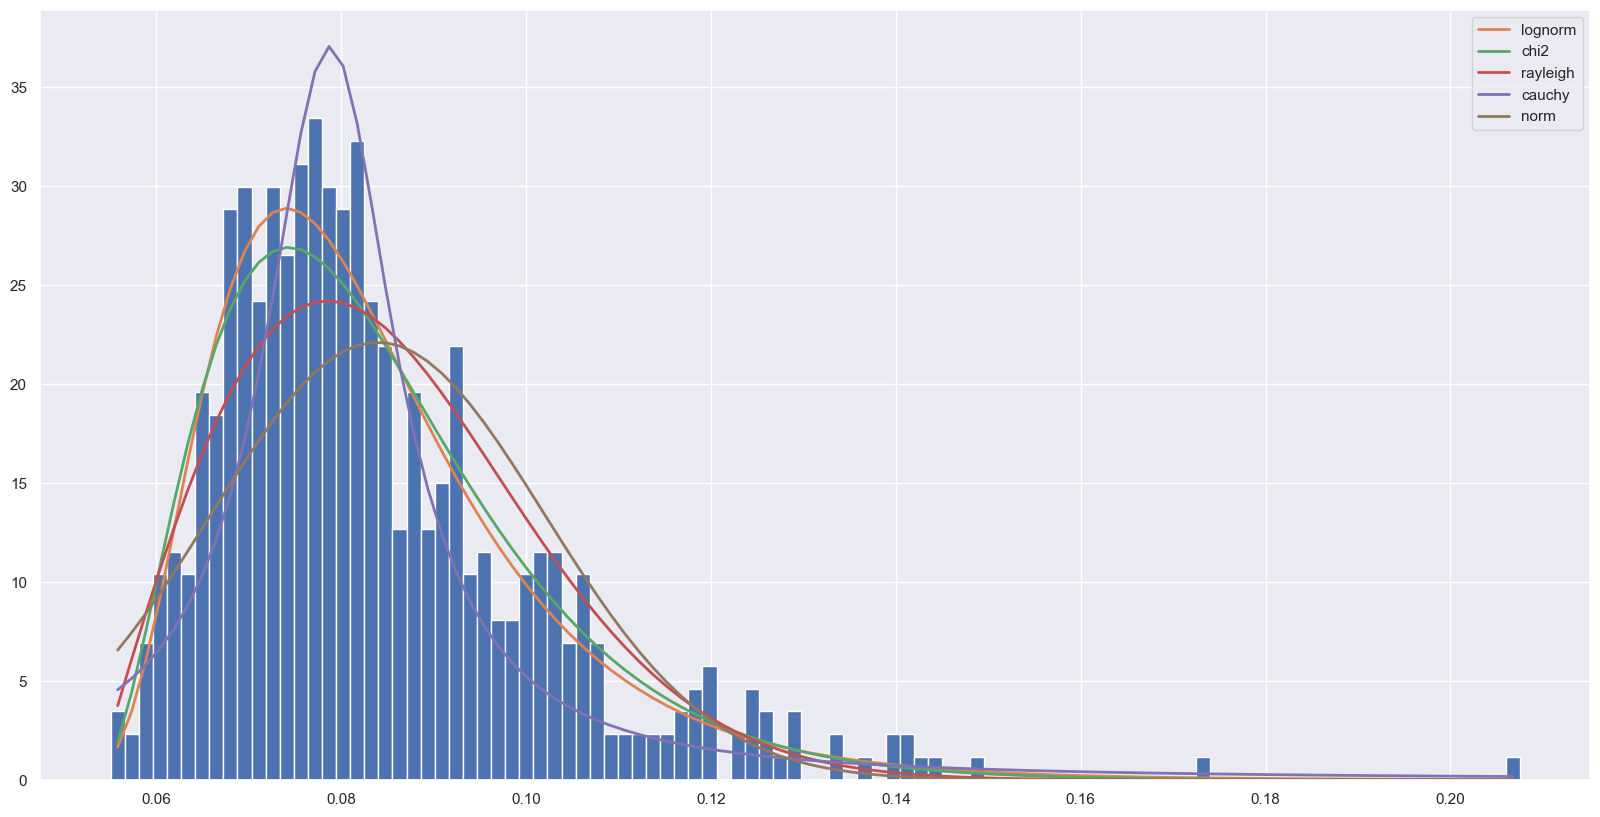

In [135]:
for variable in cancer_variables:
    print("\n")
    print(f'Variable: {variable}')
    var_prob_dist = df[variable].values
    f = Fitter(var_prob_dist,
               distributions=get_common_distributions())
    f.fit()
    f.summary()
    print(f.summary())

A reminder of the original basic statistics:

In [140]:
# These numbers can be used when generating synthetic data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.0,0.372583,0.483918,0.000000,0.000000,0.000000,1.000000,1.00000
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400


## Conclusion

## References

1. [Wisconsin Breast Cancer dataset, UCI](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29)<br>
2. [Wisconsin Breast Cancer dataset,Kaggle](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data?select=data.csv)<br>
3. [Explanation of Fine Needle Aspiration from Cancer.org](https://www.cancer.org/cancer/breast-cancer/screening-tests-and-early-detection/breast-biopsy/fine-needle-aspiration-biopsy-of-the-breast.html)<br>
4. [Analysis of the Wisconsin Breast Cancer Dataset and Machine Learning for Breast Cancer Detection](https://www.researchgate.net/publication/311950799_Analysis_of_the_Wisconsin_Breast_Cancer_Dataset_and_Machine_Learning_for_Breast_Cancer_Detection)<br>
5. [Nested for loop in seaborn](https://aparnamishra144.medium.com/data-visualization-in-a-loop-using-seaborn-and-matplotlib-499ee540726d)<br>
6. [Get rid of max open warning in matplotlib and seaborn](https://stackoverflow.com/questions/27476642/matplotlib-get-rid-of-max-open-warning-output)<br>
7. [Definition of a classifier from Deep AI](https://deepai.org/machine-learning-glossary-and-terms/classifier)<br>
8. [Wikipedia's definition of Decision Trees](https://en.wikipedia.org/wiki/Decision_tree_learning)<br>
9. [Wikipedia's definition of Naive Bayes](https://en.wikipedia.org/wiki/Naive_Bayes_classifier)<br>
10. [Wikipedia's definition of K-Nearest Neighbors](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)<br>
11. [Wikipedia's definition of Support Vector Machines](https://en.wikipedia.org/wiki/Support_vector_machine)<br>
12. [Wikipedia's definition of Logistic Regression](https://en.wikipedia.org/wiki/Logistic_regression)<br>
13. [Evaluating classifiers](https://jameskle.com/writes/ml-basics-and-evaluation)<br>
14. [Precision and Recall from Google Developers](https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall)<br>
15. [Google Developers explanation of ROC Curve and AUC](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc)<br>
16. [How to fix 'pandas has no attribute: dataframe'](https://www.statology.org/module-pandas-has-no-attribute-dataframe/)<br>
17. [For loop in seaborn and matplotlib](https://aparnamishra144.medium.com/data-visualization-in-a-loop-using-seaborn-and-matplotlib-499ee540726d)<br>
18. [Upper triangle of an array in numpy](https://numpy.org/doc/stable/reference/generated/numpy.triu.html)<br>
19. [What is clustering? (Google developers)](https://developers.google.com/machine-learning/clustering/overview)<br>
20. [Clustermap in seaborn](https://www.delftstack.com/howto/seaborn/seaborn-clustermap/)<br>
21. [Random Forest Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)<br>
22. [Pros and cons of a random forest classifier](https://www.upgrad.com/blog/random-forest-classifier/)<br>
23. [Logistic Regression Classifier](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)<br>
24. [What random_state does in train-test-split](https://builtin.com/data-science/train-test-split)<br>
25. [How to tune a decision tree](https://towardsdatascience.com/how-to-tune-a-decision-tree-f03721801680)<br>
25. [GridSearchCV with Logistic Regression](https://stackoverflow.com/questions/19018333/gridsearchcv-on-logisticregression-in-scikit-learn)<br>
25. [Optimising KNN with GridSearchCV](https://medium.com/@erikgreenj/k-neighbors-classifier-with-gridsearchcv-basics-3c445ddeb657)<br>
25. [What is a confustion matrix?](https://machinelearningmastery.com/confusion-matrix-machine-learning/)<br>
25. []()<br>
25. []()<br>
25. []()<br>
25. []()<br>
25. []()<br>
25. []()<br>
25. []()<br>
